In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('Capstone_Project')

In [ ]:
df = pd.read_csv('smartphones.csv')

In [ ]:
df.shape

(1020, 11)

In [ ]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Data Assessing

### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. ** Camera ** missing values in camera, card and os `completeness`
20. ** Price AND Rating ** datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

Starting Programatic Assesing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [ ]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Make a copy
df1=df.copy()

In [ ]:
df1

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


Price column removing ',' and '₹' and changing the type of it

In [ ]:
df1['price']=df1['price'].str.replace(',','').str.replace('₹','').astype('int')

In [ ]:
df2=df1.copy()


In [ ]:
df1=df1.reset_index()
df1['index']=df1['index']+2

In [ ]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


Extracting the common rows out of all the rows which has issues(Rows from manual observarion )

In [ ]:
processor_rows=set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
memory_rows=set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows=set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows=set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows=set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [ ]:
df1[df1['index'].isin(processor_rows | memory_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
...,...,...,...,...,...,...,...,...,...,...,...,...
954,956,Vivo X Fold 5G (12GB RAM + 512GB),118990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 512 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
988,990,Nokia 5310 Dual Sim,3399,NaN,Dual Sim,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser
993,995,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Kirin 990, Octa Core, 2.86 GHz Processor","8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"8 inches, 2200 x 2480 px Display",Foldable Display,48 MP Quad Rear Camera,"Memory Card (Hybrid), upto 256 GB"
1000,1002,XTouch F40 Flip,1999,NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera


Extracting the different rows out of all the rows which has issues(Rows from manual observarion )

In [ ]:
df1[df1['index'].isin(processor_rows & memory_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
640,642,Nokia 105 Plus,1299,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
657,659,Zanco Tiny T1,2799,NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
665,667,itel it2163S,958,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
748,750,Nokia 400 4G,3290,NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN
757,759,Karbonn KU3i,995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
817,819,itel Magic X,2239,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [ ]:
df1['price'].sort_values().head(35)

608       99
835      599
932      649
611      699
665      958
757      995
640     1299
573     1299
647     1339
881     1599
927     1685
846     1749
473     1762
685     1799
699     1850
873     1899
532     1949
575     1999
1000    1999
930     2099
817     2239
551     2399
917     2499
657     2799
533     2799
400     2999
852     3099
748     3290
988     3399
190     3499
627     3589
582     3749
926     3890
478     3990
907     3999
Name: price, dtype: int64

**phones below 3399 are not smarphones **

In [ ]:
df1[(df1['price']==3399) | (df1['price']==3499)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
190,192,Realme C2s,3499,63.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio P22 , Octa Core, 2 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.1 inches, 720 x 1560 px Display with Water D...",13 MP + 2 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v9.0 (Pie)
988,990,Nokia 5310 Dual Sim,3399,NaN,Dual Sim,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [ ]:
df1=df1[df1['price']>3400]

##**processor column** Remaiinin columns
## Turns out to be FeaturePhones so we drop them

In [ ]:
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [ ]:
df1.drop([645,857,882,925],inplace=True)

<ipython-input-730-3ba16ee24dd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([645,857,882,925],inplace=True)


#**RAM**
drop Feature phone rest don't have RAM Which can be handled while serating columns

In [ ]:
df1[df1['index'].isin(memory_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [ ]:
df1.drop([582],inplace=True)
df1.shape

<ipython-input-732-339c356eedc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([582],inplace=True)


(986, 12)

#Battery

In [ ]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [ ]:
df1.drop([376,754],inplace=True)

<ipython-input-734-d857af15b87a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([376,754],inplace=True)


In [ ]:
temp_df = df1[df1['index'].isin(battery_rows)]

In [ ]:
x = temp_df.iloc[:,7:].shift(1,axis=1).values

In [ ]:
df1.loc[temp_df.index,temp_df.columns[7:]] = x

In [ ]:
len(display_rows)

27

In [ ]:
len(camera_rows)

64

##Camera Rows
#replace shifted value in cards

In [ ]:
df1[df1['index'].isin(camera_rows)]
# 155 271  Feature phones #########

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [ ]:
df1.loc[155]

index                                                   157
model                                       Nokia 2780 Flip
price                                                  4990
rating                                                  NaN
sim                                 Dual Sim, 3G, 4G, Wi-Fi
processor    Snapdragon QM215, Quad Core, 1.3 GHz Processor
ram                                4 GB RAM, 512 MB inbuilt
battery                                    1450 mAh Battery
display                    2.7 inches, 240 x 320 px Display
camera                                         Dual Display
card                                       5 MP Rear Camera
os                        Memory Card Supported, upto 32 GB
Name: 155, dtype: object

In [ ]:
df1.drop([155,271],inplace=True)

<ipython-input-742-f3a02f21527e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([155,271],inplace=True)


In [ ]:
df1[~df1['model'].str.contains('One')]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,7,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,8,Apple iPhone 14,65999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [ ]:
temp_df=df1[df1['index'].isin(camera_rows)]
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display","Foldable Display, Dual Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [ ]:
temp_df2=temp_df[~temp_df['camera'].str.contains('MP')]

In [ ]:
df1.loc[temp_df2.index,'camera']=temp_df2['card'].values

##CARD
1. replcae Camera values by memory card not supported
2. Replacing os values by memory card not supported
3. And adding those os values in os field

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df1['card']

0                               Memory Card Not Supported
1                         Memory Card (Hybrid), upto 1 TB
2                        Memory Card Supported, upto 1 TB
3                         Memory Card (Hybrid), upto 1 TB
4                               Memory Card Not Supported
5                        Memory Card Supported, upto 1 TB
6                               Memory Card Not Supported
7                               Memory Card Not Supported
8                                             Android v12
9                                             Android v12
10                       Memory Card Supported, upto 1 TB
11                                  Memory Card Supported
12                                            Android v12
13                        Memory Card (Hybrid), upto 1 TB
14                              Memory Card Not Supported
15                              Memory Card Not Supported
16                                  Memory Card Supported
17            

In [ ]:
temp_df=df1[df1['card'].str.contains('MP')]

In [ ]:
#1
df1.loc[temp_df.index,'card']='Memory Card Not Supported'

In [ ]:
df1['card'].value_counts()

Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v13    

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
#3
temp_df=df1[~df1['card'].str.contains('Memory Card')]

In [ ]:
temp_df.index

Int64Index([   8,    9,   12,   17,   18,   20,   21,   24,   29,   37,
            ...
             971,  974,  975, 1007, 1008, 1009, 1011, 1012, 1013, 1015],
           dtype='int64', length=213)

In [ ]:
#3 os values replacement
df1.loc[temp_df.index,'os']=temp_df['card'].values

In [ ]:
temp_df=df1[~df1['card'].str.contains('Memory Card')]


In [ ]:
#2
df1.loc[temp_df.index,'card']='Memory Card Not Supported'

In [ ]:
df1['card'].value_counts()

Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
                                      ... 
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: card, Length: 16, dtype: int64

## OS
#Memory Card
1.shifting issue : Values are shifted in OS column but we have alreday filled the corresponding values in memory card with memory card not supported so shifting true values from os to memory card
#Bluetooth
2.To np.nan


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df1['os'].value_counts()


Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                     

In [ ]:
# 1
temp_df=df1[df1['os'].str.contains('Memory')]
temp_df.index

Int64Index([159, 306, 322, 365, 392, 504, 570, 613, 682, 721, 726, 844, 894,
            993],
           dtype='int64')

In [ ]:
#1
x=temp_df.iloc[:,-2:].shift(-1,axis=1).values
df1.loc[temp_df.index,['card','os']]=x

In [ ]:
#2 bluetooth
temp_df=df1[df1['os']=='Bluetooth']
temp_df.index

Int64Index([486], dtype='int64')

In [ ]:
df1.loc[temp_df.index,'os'] = np.nan

In [ ]:
df1.shape

(982, 12)

In [ ]:
df1.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## value Counts on remaining columns


In [ ]:
# df1['display'].value_counts()

In [ ]:
# df1['processor'].value_counts()

In [ ]:
# df1['battery'].value_counts()

In [ ]:
# df1['ram'].value_counts()

In [ ]:
(982/1020)*100

96.27450980392157

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int64  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    982 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         967 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 132.0+ KB


###Tidiness

1. #Models- Seperating Brand_name from model

In [ ]:
brand_names = df1['model'].str.split(' ').str.get(0)
df1.insert(1,'brand_name',brand_names)

In [ ]:
df1

,index,brand_name,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,Honor,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [ ]:
df1['brand_name']=df1['brand_name'].str.lower()

<ipython-input-777-8ab866f168c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['brand_name']=df1['brand_name'].str.lower()


In [ ]:
df1

,index,brand_name,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,motorola,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,honor,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,motorola,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


#2. sim into Three columns
1. has_5g
2.has_nfc
3. has_it_blaster

In [ ]:
has_5G=df1['sim'].str.contains('5G')
has_nfc=df1['sim'].str.contains('NFC')
has_it_blaster=df1['sim'].str.contains('IR Blaster')


In [ ]:
#df1.drop(columns=['has_5G','has_nfc','has_it_blaster'],inplace=True)

In [ ]:
df1.insert(6,'has_5G',has_5G)
df1.insert(7,'has_nfc',has_nfc)
df1.insert(8,'has_IR_blaster',has_it_blaster)

In [ ]:
df1

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,motorola,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,honor,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,motorola,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


#3. Processor
1. Processor Name
2. processor Brand
3. No_of_cores
4. Speed

In [ ]:
df1['processor']=df1['processor'].str.strip()


<ipython-input-783-9f54bc3417b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor']=df1['processor'].str.strip()


In [ ]:
# 1 Processor_Name
processor_name=df1['processor'].str.split(',').str.get(0)
df1.insert(10,'processor_name',processor_name)

In [ ]:
pd.set_option('display.max_rows',None)


In [ ]:
num_cores=df1['processor'].str.split(',').str.get(1).str.strip()
processor_speed=df1['processor'].str.split(',').str.get(2).str.strip()

In [ ]:
df1.insert(11,'num_cores',num_cores)
df1.insert(12,'processor_speed',processor_speed)

In [ ]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,Octa Core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [ ]:
df1['processor_name'].value_counts()
# processor name contains Core

Dimensity 700 5G           29
Helio P35                  28
Snapdragon 8+ Gen1         26
Snapdragon 695             24
Snapdragon 8 Gen2          23
Snapdragon 680             23
Helio G35                  20
Snapdragon  695            19
Snapdragon  680            18
Snapdragon  8 Gen1         18
Snapdragon 8 Gen1          17
Bionic A15                 16
Dimensity  810 5G          15
Helio G96                  15
Snapdragon 870             15
Helio G80                  14
Helio G99                  14
Snapdragon  8+ Gen1        12
Dimensity 810 5G           12
Snapdragon 778G            12
Dimensity 1080             12
Dimensity  920 5G          11
Helio G37                  11
Snapdragon 888             11
Snapdragon  888            10
Helio  G85                 10
Helio G25                  10
Helio G95                  10
Helio A22                  10
Bionic  A16                10
Octa Core Processor         9
Tiger T612                  9
Snapdragon 720G             8
Bionic A14

In [ ]:
# processor name contains Core
#shifting two columns
df1[df1['processor_name'].str.contains('Core')][['processor_name','num_cores','processor_speed']]

,processor_name,num_cores,processor_speed
118,Octa Core Processor,NaN,NaN
143,Quad Core,1.4 GHz Processor,NaN
188,Quad Core,1.6 GHz Processor,NaN
201,Octa Core,2 GHz Processor,NaN
309,Octa Core,2 GHz Processor,NaN
315,Quad Core,1.3 GHz Processor,NaN
496,Octa Core Processor,NaN,NaN
529,Octa Core Processor,NaN,NaN
587,Octa Core,2 GHz Processor,NaN
758,Quad Core,1.6 GHz Processor,NaN


In [ ]:
#shifting two columns
temp_df=df1[df1['processor_name'].str.contains('Core')][['processor_name','num_cores','processor_speed']].shift(1,axis=1)
df1.loc[temp_df.index,['processor_name','num_cores','processor_speed']]=temp_df.values

In [ ]:
df1['processor_name'].value_counts()

Dimensity 700 5G           29
Helio P35                  28
Snapdragon 8+ Gen1         26
Snapdragon 695             24
Snapdragon 680             23
Snapdragon 8 Gen2          23
Helio G35                  20
Snapdragon  695            19
Snapdragon  8 Gen1         18
Snapdragon  680            18
Snapdragon 8 Gen1          17
Bionic A15                 16
Dimensity  810 5G          15
Snapdragon 870             15
Helio G96                  15
Helio G99                  14
Helio G80                  14
Snapdragon 778G            12
Dimensity 1080             12
Dimensity 810 5G           12
Snapdragon  8+ Gen1        12
Dimensity  920 5G          11
Helio G37                  11
Snapdragon 888             11
Helio A22                  10
Helio G95                  10
Helio G25                  10
Bionic  A16                10
Snapdragon  888            10
Helio  G85                 10
Tiger T612                  9
Helio G88                   8
Bionic A14                  8
Snapdragon

In [ ]:
# 28nm
df1[df1['processor_name']=='(28 nm)']

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
856,858,samsung,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",(28 nm),Quad Core,1.5 GHz Processor,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [ ]:
# 28nm Replacement
df1.loc[856,'processor_name']='Mediatek MT6739'

In [ ]:
df1['num_cores'].value_counts()

Octa Core              871
Quad Core               37
Hexa Core               31
Octa Core Processor     28
Hexa Core Processor      8
Name: num_cores, dtype: int64

In [ ]:
#striping Processs at the end
df1['num_cores']=df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

<ipython-input-796-15dd8040efe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores']=df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')


In [ ]:
# Adding Processor Brand
processor_brand=df1['processor_name'].str.split(' ').str.get(0).str.lower()
processor_brand
df1.insert(11,'processor_brand',processor_brand)

In [ ]:
df1['processor_brand'].value_counts

<bound method IndexOpsMixin.value_counts of 0       snapdragon
1       snapdragon
2           exynos
3       snapdragon
4        dimensity
5       snapdragon
6           bionic
7        dimensity
8       snapdragon
9        dimensity
10      snapdragon
11       dimensity
12       dimensity
13      snapdragon
14      snapdragon
15          bionic
16           helio
17      snapdragon
18       dimensity
19           helio
20      snapdragon
21       dimensity
22      snapdragon
23      snapdragon
24       dimensity
25      snapdragon
26      snapdragon
27          bionic
28       dimensity
29      snapdragon
30      snapdragon
31      snapdragon
32       dimensity
33             a13
34       dimensity
35          exynos
36      snapdragon
37      snapdragon
38      snapdragon
39      snapdragon
40      snapdragon
41      snapdragon
42       dimensity
43       dimensity
44      snapdragon
45          exynos
46      snapdragon
47          unisoc
48           helio
49      snapdragon
50    

#issue in following processors
Octa Core Processor
Bionic  A16, Hexa Core Processor
Octa Core, 2 GHz Processor
Quad Core, 1.3 GHz Processor
Helio, Octa Core Processor
Snapdragon 778G+, Octa Core Processor
Google  Tensor, Octa Core Processor
Exynos 1330, Octa Core Processor
Octa Core, 2.2 GHz Processor
Google Tensor 3, Octa Core Processor
Dimensity 9200, Octa Core Processor
Snapdragon  778G+, Octa Core Processor
Octa Core, 1.8 GHz Processor
Bionic A16, Hexa Core Processor
Snapdragon  7 Gen2, Octa Core Processor
Kirin 659, Octa Core, 2.36 GHz Processor
Exynos 1380, Octa Core Processor
Snapdragon 775
Exynos  2300, Octa Core Processor
Bionic  A17, Octa Core Processor
Apple  A13
Unisoc, Octa Core Processor
Bionic A16
Snapdragon 8+ Gen 2, Octa Core Processor
Exynos 1280, Octa Core Processor
Dimensity  9200, Octa Core Processor
Quad Core, 1.4 GHz Processor
Unisoc T117

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df1['processor_speed'].value_counts()

2 GHz Processor       146
2.2 GHz Processor     135
2.4 GHz Processor     128
3.2 GHz Processor      94
2.3 GHz Processor      86
3 GHz Processor        53
2.84 GHz Processor     36
2.05 GHz Processor     28
2.5 GHz Processor      23
1.8 GHz Processor      23
1.6 GHz Processor      20
2.85 GHz Processor     19
3.22 GHz Processor     18
3.1 GHz Processor      15
2.6 GHz Processor      14
2.9 GHz Processor      13
1.82 GHz Processor     10
1.3 GHz Processor      10
2.73 GHz Processor      9
2.8 GHz Processor       9
3.05 GHz Processor      8
2.36 GHz Processor      8
2.7 GHz Processor       5
1.4 GHz Processor       5
2.65 GHz Processor      5
1.5 GHz Processor       4
2.96 GHz Processor      3
2.86 GHz Processor      3
3.13 GHz Processor      2
1.1 GHz Processor       1
2.35 GHz Processor      1
2.37 GHz Processor      1
1.99 GHz Processor      1
1.95 GHz Processor      1
2.1 GHz Processor       1
1.2 GHz Processor       1
Name: processor_speed, dtype: int64

In [ ]:
# only keeping processor speed
df1['processor_speed'].str.strip().str.split(' ').str.get(0)

0        3.2 GHz
1        2.2 GHz
2        2.4 GHz
3        2.2 GHz
4        2.6 GHz
5        2.2 GHz
6       3.22 GHz
7        2.6 GHz
8        2.5 GHz
9          3 GHz
10       2.2 GHz
11       2.2 GHz
12       2.6 GHz
13       2.2 GHz
14       3.2 GHz
15      3.22 GHz
16       2.3 GHz
17       3.2 GHz
18      2.85 GHz
19         2 GHz
20       3.2 GHz
21         3 GHz
22       2.2 GHz
23         2 GHz
24       3.2 GHz
25      2.84 GHz
26       2.2 GHz
27           NaN
28         2 GHz
29       3.2 GHz
30       2.2 GHz
31       2.4 GHz
32       2.2 GHz
33      2.65 GHz
34       2.4 GHz
35       2.9 GHz
36       2.2 GHz
37         3 GHz
38      2.36 GHz
39       2.4 GHz
40       2.2 GHz
41       2.2 GHz
42       2.4 GHz
43       2.6 GHz
44       2.4 GHz
45       2.4 GHz
46       2.4 GHz
47       1.8 GHz
48       2.3 GHz
49      2.36 GHz
50       2.4 GHz
51       3.1 GHz
52       2.2 GHz
53       2.2 GHz
54       2.2 GHz
55       2.4 GHz
56      3.22 GHz
57      2.05 GHz
58       3.2 G

# Ram
# seperating ram and interal memory

In [ ]:
df1['ram'].value_counts()

8 GB RAM, 128 GB inbuilt     267
6 GB RAM, 128 GB inbuilt     190
4 GB RAM, 64 GB inbuilt      143
12 GB RAM, 256 GB inbuilt     70
8 GB RAM, 256 GB inbuilt      70
4 GB RAM, 128 GB inbuilt      62
3 GB RAM, 32 GB inbuilt       37
6 GB RAM, 64 GB inbuilt       29
2 GB RAM, 32 GB inbuilt       24
3 GB RAM, 64 GB inbuilt       15
12 GB RAM, 512 GB inbuilt     10
6 GB RAM, 256 GB inbuilt       7
16 GB RAM, 256 GB inbuilt      6
4 GB RAM, 32 GB inbuilt        6
1 GB RAM, 16 GB inbuilt        6
6 GB RAM, 1 TB inbuilt         4
2 GB RAM, 16 GB inbuilt        4
2 GB RAM, 64 GB inbuilt        4
12 GB RAM, 128 GB inbuilt      4
6 GB RAM, 512 GB inbuilt       4
4 GB RAM, 256 GB inbuilt       3
16 GB RAM, 512 GB inbuilt      3
64 GB inbuilt                  2
3 GB RAM, 16 GB inbuilt        2
8 GB RAM, 512 GB inbuilt       2
1 GB RAM, 8 GB inbuilt         1
4 GB RAM, 512 GB inbuilt       1
18 GB RAM, 512 GB inbuilt      1
64 MB RAM, 128 MB inbuilt      1
512 MB RAM, 4 GB inbuilt       1
512 GB inb

'\u2009' found a unicode charachter which is a replacement of the spance replaced it with the actual space

In [ ]:
df1['processor_speed']=df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

<ipython-input-803-e9dcd96bf8f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_speed']=df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)


In [ ]:
ram_capacity=df1['ram'].str.strip().str.split(',').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [ ]:
df1.insert(15,'ram_capacity',ram_capacity)

In [ ]:
internal_memory=df1['ram'].str.strip().str.split(',').str.get(1).str.replace('\u2009',' ').str.strip().str.split(' ').str.get(0)

In [ ]:
df1.insert(16,'internal_memory',internal_memory)

In [ ]:
df1['ram_capacity'].value_counts()

8      339
6      234
4      215
12      85
3       54
2       32
16       9
1        7
64       3
18       2
512      2
Name: ram_capacity, dtype: int64

upto 18 GB its fine
512 486 nokia feature phone dropped and another huawei changed value

In [ ]:
#1. 512(MB)-drop feature phone
df1.drop([486],inplace=True)

<ipython-input-809-1b5654778c49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([486],inplace=True)


In [ ]:
#1 512
df1[df1['ram_capacity']=='512']

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,ram_capacity,internal_memory,battery,display,camera,card,os
483,485,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.2,512 GB inbuilt,512,NaN,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0


In [ ]:
# 512 value update
df1.loc[483,['ram_capacity','internal_memory']]=['12','512']


In [ ]:
df1[df1['ram_capacity']=='64'][['ram_capacity','internal_memory']]

,ram_capacity,internal_memory
439,64,NaN
627,64,128
762,64,NaN


In [ ]:
# 64
# drop 627 (64MB with feature phone)
df1.drop(627,inplace=True)

<ipython-input-813-3de9e5c6de07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(627,inplace=True)


In [ ]:
df1[df1['ram_capacity']=='64']

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,ram_capacity,internal_memory,battery,display,camera,card,os
439,441,apple,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,bionic,Hexa Core,3.22,64 GB inbuilt,64,NaN,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
762,764,apple,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,bionic,Hexa Core,3.22,64 GB inbuilt,64,NaN,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


In [ ]:
# 64
# changed values of apple phones
df1.loc[[439,762],['ram_capacity','internal_memory']]=['4','64']

In [ ]:
df1['ram_capacity']=df1['ram_capacity'].astype(float)

<ipython-input-816-1fae9ec3fa65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ram_capacity']=df1['ram_capacity'].astype(float)


#internal_memory

In [ ]:
df1['internal_memory'].value_counts()

128    523
64     193
256    157
32      67
512     22
16      12
1        5
8        1
Name: internal_memory, dtype: int64

In [ ]:
df1['internal_memory']=df1['internal_memory'].astype(float)

<ipython-input-818-4ac5f817f7ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['internal_memory']=df1['internal_memory'].astype(float)


In [ ]:
df1[df1['internal_memory']<32]

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,ram_capacity,internal_memory,battery,display,camera,card,os
290,292,apple,Apple iPhone 14 Pro Max (1TB),182999,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",Bionic A16,bionic,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",6.0,1.0,4323 mAh Battery with Fast Charging,"6.7 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16
399,401,itel,itel P36,6490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Spreadtrum SC7731E, Quad Core, 1.3 GHz Processor",Spreadtrum SC7731E,spreadtrum,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1.0,16.0,5000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 0.3 MP Dual Rear & 8 MP Front Camera,Memory Card Not Supported,Android v9.0 (Pie)
477,479,vivo,Vivo Y25,7499,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Helio MT6580, Quad Core, 1.3 GHz Processor",Helio MT6580,helio,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1.0,16.0,1900 mAh Battery,"4.5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v5.1 (Lollipop)
574,576,vivo,Vivo Y71,25000,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Snapdragon 425, Quad Core, 1.4 GHz Processor",Snapdragon 425,snapdragon,Quad Core,1.40,"3 GB RAM, 16 GB inbuilt",3.0,16.0,3360 mAh Battery,"6 inches, 720 x 1440 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v8.1 (Oreo)
735,737,tecno,Tecno Pop 5 Go,6999,NaN,"Dual Sim, 3G, Wi-Fi",False,False,False,"Spreadtrum SC7731, Quad Core, 1.3 GHz Processor",Spreadtrum SC7731,spreadtrum,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1.0,16.0,4000 mAh Battery,"6.1 inches, 720 x 1520 px Display with Water D...",5 MP + 0.3 MP Dual Rear & 5 MP Front Camera,Memory Card Supported,Android v11
738,740,nokia,Nokia C01 Plus,5249,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC9863A, Octa Core, 1.6 GHz Processor",Unisoc SC9863A,unisoc,Octa Core,1.60,"2 GB RAM, 16 GB inbuilt",2.0,16.0,3000 mAh Battery,"5.45 inches, 720 x 1440 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
744,746,itel,itel S16,5990,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC7731E, Quad Core, 1.3 GHz Processor",Unisoc SC7731E,unisoc,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1.0,16.0,4000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 2 MP + 0.3 MP Triple Rear & 8 MP Front ...,"Memory Card Supported, upto 32 GB",Android v10
781,783,apple,Apple iPhone 13 Pro Max (1TB),179900,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,bionic,Hexa Core,3.22,"6 GB RAM, 1 TB inbuilt",6.0,1.0,4352 mAh Battery with Fast Charging,"6.7 inches, 1284 x 2778 px, 120 Hz Display wit...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
794,796,itel,itel A56,5490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.3 GHz Processor",None,None,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1.0,16.0,4000 mAh Battery,"6 inches, 720 x 1600 px Display",8 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Android v9.0 (Pie)
814,816,apple,Apple iPhone 14 Pro (1TB),172999,77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",Bionic A16,bionic,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",6.0,1.0,3200 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16


In [ ]:
# 1TB to 1024
temp_df=df1[df1['internal_memory']==1]
df1.loc[temp_df.index,['internal_memory']]=1024

#Battery
two columns 1. capacity 2. fast charging

In [ ]:
battery_capacity=df1['battery'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [ ]:
df1.insert(18,'battery_capacity',battery_capacity)

In [ ]:
df1['battery_capacity']=df1['battery_capacity'].astype(float)

<ipython-input-823-6bd835b68a7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['battery_capacity']=df1['battery_capacity'].astype(float)


In [ ]:
fast_charging=df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df1.insert(19,'fast_charging',fast_charging)

In [ ]:
df1['fast_charging'].value_counts()

33W      152
18W      128
Fast      68
67W       65
25W       53
120W      46
15W       43
80W       42
66W       37
10W       33
30W       32
65W       30
44W       23
45W       17
20W       10
68W        7
100W       7
150W       7
125W       6
22.5W      5
40W        5
60W        4
55W        3
21W        2
50W        2
210W       2
240W       1
19W        1
200W       1
135W       1
165W       1
180W       1
27W        1
68.2W      1
Name: fast_charging, dtype: int64

#Display
three columns

In [ ]:
#screen_size
screen_size = df1['display'].str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype(float)

In [ ]:
df1.insert(21,'screen_size',screen_size)

In [ ]:
#resolution
resolution=df1['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)
df1.insert(22,'resolution',resolution)

In [ ]:
temp_df=df1['display'].str.strip().str.split('px').str.get(1).str.strip().str.split(' ').str.get(1)


In [ ]:
def fill_missing_reso (str):
  if(str=='with' or pd.isna(str)):
    return '60'
  else:
    return str

In [ ]:
refresh_rate=temp_df.apply(fill_missing_reso)
df1.insert(23,'refresh_rate',refresh_rate)

In [ ]:
df1['refresh_rate']=df1['refresh_rate'].astype(float)

<ipython-input-833-f812d0199389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['refresh_rate']=df1['refresh_rate'].astype(float)


#Camera
4. columns:
4.1:NO of Rear camera
4.2: NO of front cameras
4.3 Primary rear camera
4.4 Primary front camera



In [ ]:
df1['camera'].value_counts()

50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera                   40
64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera                   38
50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front Camera                   34
13 MP + 2 MP Dual Rear & 5 MP Front Camera                             23
12 MP + 12 MP Dual Rear & 12 MP Front Camera                           20
13 MP Rear & 5 MP Front Camera                                         20
50 MP + 2 MP + 2 MP Triple Rear & 8 MP Front Camera                    20
50 MP + 2 MP Dual Rear & 8 MP Front Camera                             19
8 MP Rear & 5 MP Front Camera                                          19
64 MP Quad Rear & 32 MP Front Camera                                   18
108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera                  18
13 MP + 2 MP Dual Rear & 8 MP Front Camera                             18
64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front Camera                   16
50 MP + 2 MP Dual Rear & 5 MP Front Ca

In [ ]:
def camera_extractor(text):

  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  elif 'Missing' in text:
    return 'Missing'
  else:
    return '1'

In [ ]:
num_rear_cameras=df1['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)

In [ ]:
df1.insert(25,'num_rear_cameras',num_rear_cameras)

In [ ]:
num_front_cameras = df1['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)

In [ ]:
df1.insert(26,'num_front_cameras',num_front_cameras)

In [ ]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,ram_capacity,internal_memory,battery,battery_capacity,fast_charging,display,screen_size,resolution,refresh_rate,camera,num_rear_cameras,num_front_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256.0,5000 mAh Battery with 100W Fast Charging,5000.0,100W,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,1440 x 3216,120.0,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128.0,5000 mAh Battery with 33W Fast Charging,5000.0,33W,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120.0,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64.0,5000 mAh Battery with 15W Fast Charging,5000.0,15W,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,1080 x 2408,90.0,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128.0,5000 mAh Battery with Fast Charging,5000.0,Fast,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120.0,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128.0,5000 mAh Battery with 67W Fast Charging,5000.0,67W,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,1080 x 2412,120.0,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13


In [ ]:
df1[df1['num_front_cameras'] == 'Missing']

,index,brand_name,model,price,rating,sim,has_5G,has_nfc,has_IR_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,ram_capacity,internal_memory,battery,battery_capacity,fast_charging,display,screen_size,resolution,refresh_rate,camera,num_rear_cameras,num_front_cameras,card,os
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"8 GB RAM, 256 GB inbuilt",8.0,256.0,5000 mAh Battery with 67W Fast Charging,5000.0,67W,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,1792 x 1920,120.0,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Android v12
462,464,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 855+, Octa Core, 2.96 GHz Processor",Snapdragon 855+,snapdragon,Octa Core,2.96,"12 GB RAM, 512 GB inbuilt",12.0,512.0,4050 mAh Battery with 40W Fast Charging,4050.0,40W,"7.92 inches, 2088 x 2250 px Display",7.92,2088 x 2250,60.0,108 MP + 20 MP + 12 MP Triple Rear Camera,3,Missing,Memory Card Not Supported,Android v10
993,995,huawei,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Kirin 990, Octa Core, 2.86 GHz Processor",Kirin 990,kirin,Octa Core,2.86,"8 GB RAM, 512 GB inbuilt",8.0,512.0,4500 mAh Battery with 55W Fast Charging,4500.0,55W,"8 inches, 2200 x 2480 px Display",8.00,2200 x 2480,60.0,48 MP Quad Rear Camera,4,Missing,"Memory Card (Hybrid), upto 256 GB",None
1012,1014,itel,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor",Spreadtrum SC9832E,spreadtrum,Quad Core,1.40,"2 GB RAM, 32 GB inbuilt",2.0,32.0,3020 mAh Battery,3020.0,NaN,"5 inches, 854 x 480 px Display",5.00,854 x 480,60.0,2 MP Rear Camera,1,Missing,Memory Card Not Supported,Android v11


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
#df1[df1['camera'] == 'Foldable Display, Dual Display']
df1.loc[69,'camera'] == '50 MP'

False

In [ ]:
df1.loc[69]

index                                                               71
brand_name                                                        oppo
model                                                 Oppo Find N Fold
price                                                            99990
rating                                                             NaN
sim                            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC
has_5G                                                            True
has_nfc                                                           True
has_IR_blaster                                                   False
processor            Snapdragon  8+ Gen1, Octa Core, 3.2 GHz Processor
processor_name                                     Snapdragon  8+ Gen1
processor_brand                                             snapdragon
num_cores                                                    Octa Core
processor_speed                                                    3.2
ram   

In [ ]:
temp_df = df1[df1['camera'] == 'Foldable Display, Dual Display']

In [ ]:
df1.loc[temp_df.index, 'camera'] = '50 MP'

In [ ]:
primary_rear_camera=df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [ ]:
primary_front_camera= df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [ ]:
df1.columns

Index(['index', 'brand_name', 'model', 'price', 'rating', 'sim', 'has_5G',
       'has_nfc', 'has_IR_blaster', 'processor', 'processor_name',
       'processor_brand', 'num_cores', 'processor_speed', 'ram',
       'ram_capacity', 'internal_memory', 'battery', 'battery_capacity',
       'fast_charging', 'display', 'screen_size', 'resolution', 'refresh_rate',
       'camera', 'num_rear_cameras', 'num_front_cameras', 'card', 'os'],
      dtype='object')

In [ ]:
df1.insert(27,'primary_rear_camera',primary_rear_camera)

In [ ]:
df1.insert(28,'primary_front_camera',primary_front_camera)

#Memory Card
1. Extended memory available or not
2. Extended Upto

In [ ]:
df1['card'].value_counts()

Memory Card Not Supported              354
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported, upto 256 GB      89
Memory Card Supported                   88
Memory Card (Hybrid)                    31
Memory Card (Hybrid), upto 256 GB       15
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       7
Memory Card Supported, upto 2 TB         5
Memory Card (Hybrid), upto 128 GB        3
Memory Card Supported, upto 32 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 2 TB          3
Memory Card Supported, upto 1000 GB      1
Name: card, dtype: int64

In [ ]:
# fucntion to seperate has memory card or not

In [ ]:
temp_df=df1['card'].apply(lambda x: 0 if 'Not' in x else 1)
temp_df.value_counts()

1    626
0    354
Name: card, dtype: int64

In [ ]:
df1.insert(30,'extended_memory_available',temp_df)

In [ ]:
df1['extended_upto']=df1['card'].str.split('upto').str.get(-1).str.strip().apply(lambda x: np.nan if 'Memory' in x else x)

<ipython-input-856-1d834a56181f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['extended_upto']=df1['card'].str.split('upto').str.get(-1).str.strip().apply(lambda x: np.nan if 'Memory' in x else x)


In [ ]:
#'Not Specified' value update
temp_df=df1[df1['extended_upto']=='Not Specified']
df1.loc[temp_df.index,'extended_upto']=np.nan


In [ ]:
df1['extended_upto'].value_counts()

1 TB       262
512 GB     116
256 GB     104
128 GB      10
2 TB         8
32 GB        3
64 GB        3
1000 GB      1
Name: extended_upto, dtype: int64

In [ ]:
df1['extended_upto'].str.split(' ')

0             NaN
1          [1 TB]
2          [1 TB]
3          [1 TB]
4             NaN
5          [1 TB]
6             NaN
7             NaN
8             NaN
9             NaN
10         [1 TB]
11            NaN
12            NaN
13         [1 TB]
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19         [1 TB]
20            NaN
21            NaN
22         [1 TB]
23         [1 TB]
24            NaN
25            NaN
26         [1 TB]
27            NaN
28         [1 TB]
29            NaN
30         [1 TB]
31            NaN
32            NaN
33            NaN
34         [1 TB]
35            NaN
36         [1 TB]
37            NaN
38       [512 GB]
39            NaN
40         [1 TB]
41         [1 TB]
42         [1 TB]
43            NaN
44         [1 TB]
45         [1 TB]
46       [512 GB]
47         [1 TB]
48            NaN
49         [1 TB]
50         [1 TB]
51            NaN
52       [512 GB]
53         [1 TB]
54         [1 TB]
55        

In [ ]:
df1['extended_upto']=df1['extended_upto'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

<ipython-input-860-05214aadea2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['extended_upto']=df1['extended_upto'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)


In [ ]:
temp_df=df1['extended_upto'][df1['extended_upto']=='1']
temp_df.index
df1.loc[temp_df.index,'extended_upto']='1024'

In [ ]:
temp_df=df1['extended_upto'][df1['extended_upto']=='2']
temp_df.index
df1.loc[temp_df.index,'extended_upto']='2048'

In [ ]:
pd.set_option('display.max_rows',50)

# OS
1.Andrioid
2.IOS
3.Other

In [ ]:
df1['os'].value_counts()

Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
EMUI v12                             2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
Android v12.1                        2
iOS v14.0                            2
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
iOS v17                  

In [ ]:
temp_df=df1['os'][df1['os'].isna()]
df1.loc[temp_df.index,'os']='other'

In [ ]:
def os_extractor(text):

  if 'Android' in text:
    return 'Android'
  elif 'iOS' in text:
    return 'ios'
  else:
    return 'other'

In [ ]:
df1['os'] = df1['os'].apply(os_extractor)

<ipython-input-867-1680220cd6dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['os'] = df1['os'].apply(os_extractor)


In [ ]:
df1['os'].value_counts()

Android    910
ios         46
other       24
Name: os, dtype: int64

In [ ]:
export_df = df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

In [ ]:
export_df.to_csv('smartphone_cleaned_v2.csv',index=False)

In [ ]:
df1['extended_upto'].value_counts()

1024    262
512     116
256     104
128      10
2048      8
32        3
64        3
1000      1
Name: extended_upto, dtype: int64

In [ ]:
temp_df=df1['extended_upto'][df1['extended_upto']=='1000']
df1.loc[temp_df.index,'extended_upto']='1024'

In [ ]:
df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'],inplace=True)

<ipython-input-873-b9a83b5e26bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'],inplace=True)


In [ ]:
df1

,brand_name,model,price,rating,has_5G,has_nfc,has_IR_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_rear_camera,primary_front_camera,extended_memory_available,os,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,3.20,12.0,256.0,5000.0,100W,6.70,1440 x 3216,120.0,3,1,50,16,0,Android,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.20,6.0,128.0,5000.0,33W,6.59,1080 x 2412,120.0,3,1,64,16,1,Android,1024
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,exynos,Octa Core,2.40,4.0,64.0,5000.0,15W,6.60,1080 x 2408,90.0,3,1,50,13,1,Android,1024
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.20,6.0,128.0,5000.0,Fast,6.55,1080 x 2400,120.0,3,1,50,16,1,Android,1024
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,dimensity,Octa Core,2.60,6.0,128.0,5000.0,67W,6.70,1080 x 2412,120.0,3,1,108,16,0,Android,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,Snapdragon 8 Gen1,snapdragon,Octa Core,3.00,8.0,128.0,5000.0,68.2W,6.67,1080 x 2460,120.0,3,1,64,16,0,Android,NaN
1016,honor,Honor X8 5G,14990,75.0,True,False,False,Snapdragon 480+,snapdragon,Octa Core,2.20,6.0,128.0,5000.0,22.5W,6.50,720 x 1600,60.0,3,1,48,8,1,Android,1024
1017,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,Dimensity 8100,dimensity,Octa Core,2.85,8.0,256.0,5080.0,67W,6.60,1080 x 2460,144.0,3,1,64,16,0,Android,NaN
1018,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,Snapdragon 695,snapdragon,Octa Core,2.20,6.0,128.0,5000.0,Fast,6.80,1080 x 2400,60.0,3,1,108,32,1,Android,1024


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_IR_blaster             980 non-null    bool   
 7   processor_name             960 non-null    object 
 8   processor_brand            960 non-null    object 
 9   num_cores                  974 non-null    object 
 10  processor_speed            938 non-null    float64
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  battery_capacity           969 non-null    float6

In [ ]:
df1['primary_rear_camera']=df1['primary_rear_camera'].astype(float)

<ipython-input-877-abafe247f18e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_rear_camera']=df1['primary_rear_camera'].astype(float)


In [ ]:
df1['extended_upto']=df1['extended_upto'].astype(float)

<ipython-input-878-cf40daf9e8ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['extended_upto']=df1['extended_upto'].astype(float)


In [ ]:
df1['num_rear_cameras']=df1['num_rear_cameras'].astype(int)

<ipython-input-879-0e58fdd17579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_rear_cameras']=df1['num_rear_cameras'].astype(int)


In [ ]:
df1.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5G                         0
has_nfc                        0
has_IR_blaster                 0
processor_name                20
processor_brand               20
num_cores                      6
processor_speed               42
ram_capacity                   0
internal_memory                0
battery_capacity              11
fast_charging                143
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              0
primary_rear_camera            0
primary_front_camera           4
extended_memory_available      0
os                             0
extended_upto                473
dtype: int64

In [ ]:
df1['brand_name'].value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: brand_name, dtype: int64

<Axes: >

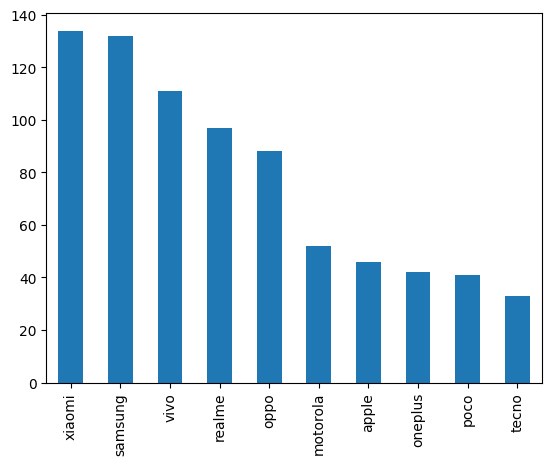

In [ ]:
# top 10 phone brands
df1['brand_name'].value_counts().head(10).plot(kind='bar')

In [ ]:
df1['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

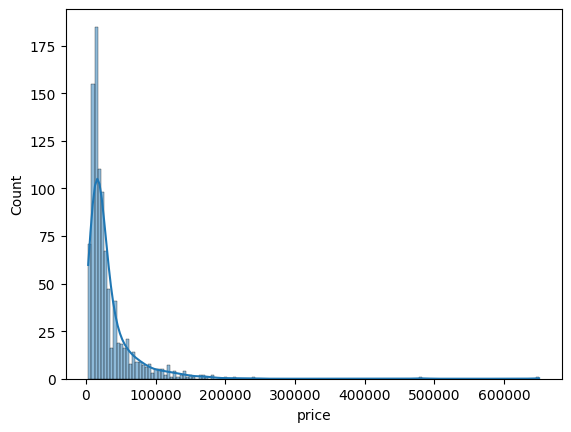

In [ ]:
sns.histplot(df1['price'],kde=True)

In [ ]:
df1['price'].skew()

6.591790999665567

<Axes: >

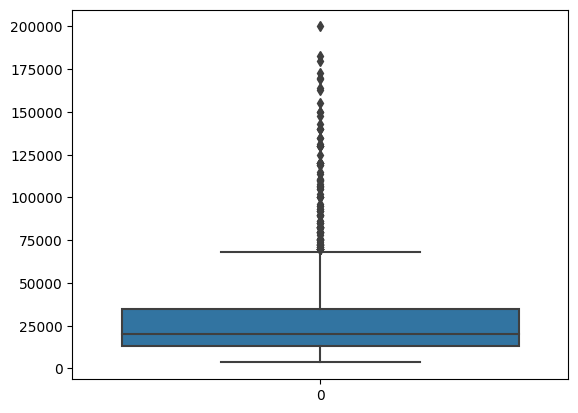

In [ ]:
sns.boxplot(df1['price'][df1['price']<200000])

In [ ]:
df1[df1['price']>200000]

,brand_name,model,price,rating,has_5G,has_nfc,has_IR_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_rear_camera,primary_front_camera,extended_memory_available,os,extended_upto
431,vertu,Vertu Signature Touch,650000,62.0,False,True,False,Snapdragon 801,snapdragon,Octa Core,1.50,2.0,64.0,2275.0,NaN,4.70,1080 x 1920,60.0,1,1,13.0,2.1,0,Android,NaN
483,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,12.0,512.0,4700.0,66W,6.74,1212 x 2616,120.0,3,1,50.0,13,1,other,256.0
921,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,Snapdragon 855,snapdragon,Octa Core,2.80,8.0,256.0,4000.0,27W,6.39,1080 x 2340,60.0,3,1,48.0,20,0,Android,NaN
990,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,Kirin 990,kirin,Octa Core,2.86,12.0,512.0,4500.0,Fast,6.53,1176 x 2400,60.0,4,2,40.0,32,1,Android,256.0


<Axes: xlabel='rating', ylabel='Count'>

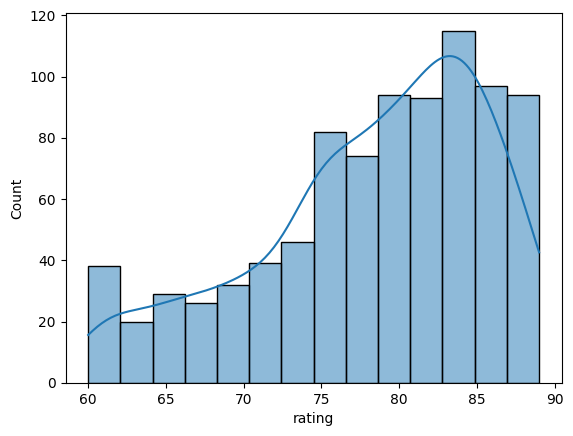

In [ ]:
# Rating
sns.histplot(df1['rating'],kde=True)

In [ ]:
df1['rating'].skew()

-0.6989993034105535

<Axes: >

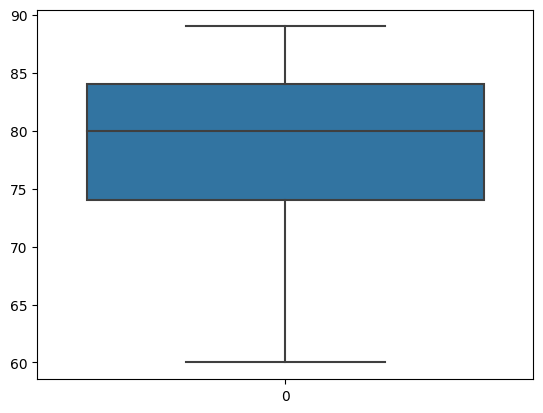

In [ ]:
sns.boxplot(df1['rating'])

In [ ]:
df1['rating'].isnull().sum()

101

In [ ]:
df1['has_5G'].value_counts()

True     549
False    431
Name: has_5G, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_IR_blaster             980 non-null    bool   
 7   processor_name             960 non-null    object 
 8   processor_brand            960 non-null    object 
 9   num_cores                  974 non-null    object 
 10  processor_speed            938 non-null    float64
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  battery_capacity           969 non-null    float6

In [ ]:
df1['processor_brand'] = df1['processor_brand'].str.replace('sanpdragon','snapdragon')
df1['processor_brand'] = df1['processor_brand'].str.replace('apple','bionic')
df1['processor_brand'] = df1['processor_brand'].str.replace('samsung','exynos')

<ipython-input-894-96c55da25cf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_brand'] = df1['processor_brand'].str.replace('sanpdragon','snapdragon')
<ipython-input-894-96c55da25cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_brand'] = df1['processor_brand'].str.replace('apple','bionic')
<ipython-input-894-96c55da25cf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df1['processor_brand'].value_counts()

snapdragon    408
helio         201
dimensity     177
exynos         50
bionic         40
unisoc         26
tiger          24
google          9
kirin           7
a13             5
qualcomm        5
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

In [ ]:
temp_df=df1[df1['processor_brand']=='qualcomm']

In [ ]:
temp_df = df1[df1['processor_brand'] == 'qualcomm']
df1.loc[temp_df.index, 'processor_brand'] = 'snapdragon'

In [ ]:
temp_df=df1[df1['processor_brand']=='a13']
df1.loc[temp_df.index,'processor_brand']='bionic'

In [ ]:
df1['processor_brand'].value_counts()

snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

In [ ]:
df1[df1['processor_brand'].isnull()]

,brand_name,model,price,rating,has_5G,has_nfc,has_IR_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_rear_camera,primary_front_camera,extended_memory_available,os,extended_upto
118,tesla,Tesla Pi Phone,69999,83.0,True,True,False,None,None,Octa Core,NaN,16.0,512.0,5000.0,120W,6.73,1080 x 2448,165.0,3,1,50.0,32,0,Android,NaN
143,jio,Jio Phone 3,4499,NaN,False,False,False,None,None,Quad Core,1.4,2.0,64.0,2800.0,NaN,5.00,720 x 1280,60.0,1,1,5.0,2,1,Android,128.0
188,ikall,iKall Z19 Pro,8099,60.0,False,False,False,None,None,Quad Core,1.6,4.0,64.0,5000.0,NaN,6.50,720 x 1600,60.0,1,1,13.0,8,1,Android,128.0
201,samsung,Samsung Galaxy A13,14450,75.0,False,False,False,None,None,Octa Core,2.0,4.0,64.0,5000.0,25W,6.60,1080 x 2408,60.0,4,1,50.0,8,1,Android,1024.0
309,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,False,False,False,None,None,Octa Core,2.0,4.0,128.0,5000.0,25W,6.60,1080 x 2408,60.0,4,1,50.0,8,1,Android,1024.0
315,itel,itel S16 Pro,6990,NaN,False,False,False,None,None,Quad Core,1.3,2.0,32.0,4000.0,NaN,6.60,1600 x 720,60.0,3,1,8.0,8,1,Android,32.0
496,samsung,Samsung Galaxy A15,15990,63.0,False,False,False,None,None,Octa Core,NaN,6.0,64.0,5000.0,Fast,6.50,720 x 1600,60.0,3,1,48.0,8,1,Android,1024.0
529,samsung,Samsung Galaxy F14,14990,67.0,False,True,False,None,None,Octa Core,NaN,4.0,64.0,5000.0,25W,6.62,2408 x 1080,60.0,3,1,50.0,16,1,Android,1024.0
587,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),16499,78.0,False,False,False,None,None,Octa Core,2.0,6.0,128.0,5000.0,25W,6.60,1080 x 2408,60.0,4,1,50.0,8,1,Android,1024.0
758,ikall,iKall Z19,7999,61.0,False,False,False,None,None,Quad Core,1.6,4.0,32.0,5000.0,NaN,6.50,720 x 1600,60.0,1,1,20.0,13,1,Android,128.0


In [ ]:
df1['processor_brand'].value_counts()

snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

#Fillining actual processor values where they are missing

In [ ]:
temp_df=df1[df1['processor_brand'].isnull()]

In [ ]:
p=['snadragon','mediaTek','unisoc','mediatek','mediatek','unisoc','mediatek','exynos','exynos','unisoc','mediatek','unisoc','exynos',
   'snadragon','mediatek','exynos','snadragon','snadragon','unisoc','snapdragon']

In [ ]:
df1.loc[temp_df.index,'processor_brand']=p

In [ ]:
df1['num_cores'].info()

<class 'pandas.core.series.Series'>
Int64Index: 980 entries, 0 to 1019
Series name: num_cores
Non-Null Count  Dtype 
--------------  ----- 
974 non-null    object
dtypes: object(1)
memory usage: 47.6+ KB


In [ ]:
df1['num_cores'].value_counts()

Octa Core    899
Hexa Core     39
Quad Core     36
Name: num_cores, dtype: int64

In [ ]:
df1[df1['num_cores'].isnull()]

,brand_name,model,price,rating,has_5G,has_nfc,has_IR_blaster,processor_name,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_rear_camera,primary_front_camera,extended_memory_available,os,extended_upto
152,apple,Apple iPhone 15 Pro Max,142990,79.0,True,True,False,Bionic A16,bionic,NaN,NaN,8.0,256.0,4352.0,25W,6.68,1284 x 2778,120.0,3,1,50.0,12,0,ios,NaN
263,apple,Apple iPhone XR2,71999,60.0,False,True,False,Apple A13,bionic,NaN,NaN,4.0,64.0,3060.0,Fast,6.10,828 x 1792,60.0,2,1,12.0,7,0,ios,NaN
282,apple,Apple iPhone 14 Mini,69990,70.0,False,True,False,Bionic A16,bionic,NaN,NaN,6.0,128.0,3500.0,Fast,5.42,1080 x 2340,60.0,2,1,12.0,12,0,ios,NaN
429,nokia,Nokia X50 5G,34999,76.0,True,False,False,Snapdragon 775,snapdragon,NaN,NaN,6.0,64.0,6000.0,33W,6.81,1080 x 2400,60.0,4,1,108.0,32,1,Android,NaN
448,apple,Apple iPhone 15 Pro,130990,75.0,True,True,False,Bionic A16,bionic,NaN,NaN,8.0,128.0,NaN,None,6.06,1170 x 2532,120.0,3,1,50.0,12,0,ios,NaN
728,apple,Apple iPhone 15,82990,72.0,False,True,False,Bionic A16,bionic,NaN,NaN,6.0,128.0,3285.0,Fast,6.06,1170 x 2532,60.0,2,1,50.0,13,0,ios,NaN


# Fillining missing values


In [ ]:
temp_df=df1[df1['num_cores'].isnull()]

In [ ]:
df1.loc[temp_df.index,'num_cores']='Hexa Core'

#processsor_speed

In [ ]:
df1['processor_speed'].describe()

count    938.000000
mean       2.427217
std        0.464090
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

In [ ]:
df1['processor_speed'].skew()

0.18833557463624606

<Axes: >

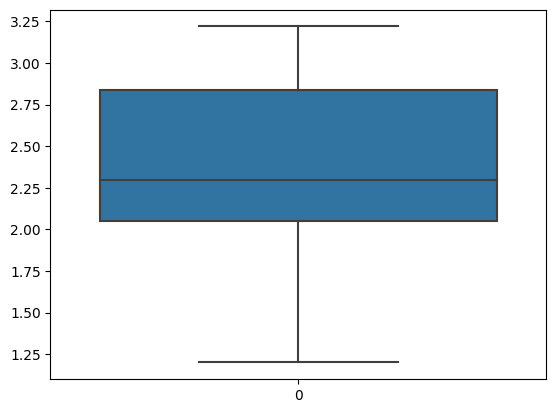

In [ ]:
sns.boxplot(df1['processor_speed'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_IR_blaster             980 non-null    bool   
 7   processor_name             960 non-null    object 
 8   processor_brand            980 non-null    object 
 9   num_cores                  980 non-null    object 
 10  processor_speed            938 non-null    float64
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  battery_capacity           969 non-null    float6

In [ ]:
df1['battery_capacity'].describe()

count      969.000000
mean      4817.748194
std       1009.540054
min       1821.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

# adding one more column of fast chrging(0,1)

In [ ]:
df1['fast_charging'].isnull().sum()

143

In [ ]:
def fast_charging(l):
  if pd.isna(l):
    fast_charge=0
  else:
    fast_charge=1
  return fast_charge

In [ ]:
temp_df=df1['fast_charging'].apply(fast_charging)

In [ ]:
df1.insert(14,'fast_charging_available',temp_df)

In [ ]:
df1['fast_charging'].isna().sum()

143

In [ ]:
df1['fast_charging']=df1['fast_charging'].str.split('W').str.get(0)

<ipython-input-920-55c6a6f1c3f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fast_charging']=df1['fast_charging'].str.split('W').str.get(0)


In [ ]:
temp_df=df1['fast_charging'][df1['fast_charging']=='Fast']

In [ ]:
df1.loc[temp_df.index,'fast_charging']=np.nan

In [ ]:
df1['fast_charging'].astype(float)

0       100.0
1        33.0
2        15.0
3         NaN
4        67.0
        ...  
1015     68.2
1016     22.5
1017     67.0
1018      NaN
1019      NaN
Name: fast_charging, Length: 980, dtype: float64

In [ ]:
df1['ram_capacity'].value_counts()

8.0     339
6.0     234
4.0     217
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
Name: ram_capacity, dtype: int64

In [ ]:
df1['internal_memory'].value_counts()

128.0     523
64.0      193
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: internal_memory, dtype: int64

In [ ]:
df1['screen_size'].describe()

count    980.000000
mean       6.536765
std        0.349162
min        3.540000
25%        6.500000
50%        6.580000
75%        6.670000
max        8.030000
Name: screen_size, dtype: float64

In [ ]:
df1['screen_size'].skew()

-2.11619902968816

<Axes: >

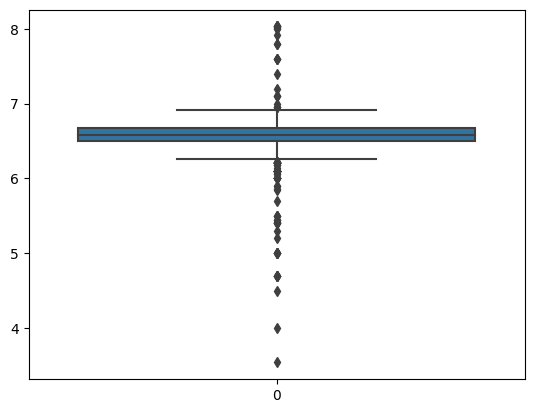

In [ ]:
sns.boxplot(df1['screen_size'])

In [ ]:
df1['fast_charging']=df1['fast_charging'].astype('float')

<ipython-input-929-99e0a0d46ea3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fast_charging']=df1['fast_charging'].astype('float')


In [ ]:
df1['resolution']

0       1440 x 3216 
1       1080 x 2412 
2       1080 x 2408 
3       1080 x 2400 
4       1080 x 2412 
            ...     
1015    1080 x 2460 
1016     720 x 1600 
1017    1080 x 2460 
1018    1080 x 2400 
1019    1080 x 2400 
Name: resolution, Length: 980, dtype: object

In [ ]:
df1['refresh_rate']

0       120.0
1       120.0
2        90.0
3       120.0
4       120.0
        ...  
1015    120.0
1016     60.0
1017    144.0
1018     60.0
1019     60.0
Name: refresh_rate, Length: 980, dtype: float64

In [ ]:
df1['num_front_cameras'].value_counts()

1          947
2           29
Missing      4
Name: num_front_cameras, dtype: int64

In [ ]:
temp_df=df1[df1['num_front_cameras']=='Missing']

In [ ]:
df1.loc[temp_df.index,'num_front_cameras']=np.nan

In [ ]:
df1['num_front_cameras']=df1['num_front_cameras'].astype(float)

<ipython-input-935-534d3ff1083a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_front_cameras']=df1['num_front_cameras'].astype(float)


In [ ]:
df1['primary_front_camera']=df1['num_front_cameras'].astype(float)

<ipython-input-936-fb89bb2dd0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_front_camera']=df1['num_front_cameras'].astype(float)


# Converting cores to numbers

In [ ]:
df1['num_cores'] = df1['num_cores'].str.replace('Octa Core','8')
df1['num_cores'] = df1['num_cores'].str.replace('Hexa Core','6')
df1['num_cores'] = df1['num_cores'].str.replace('Quad Core','4')

<ipython-input-937-81ed3b5be7c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores'] = df1['num_cores'].str.replace('Octa Core','8')
<ipython-input-937-81ed3b5be7c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores'] = df1['num_cores'].str.replace('Hexa Core','6')
<ipython-input-937-81ed3b5be7c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
df1['num_cores']=df1['num_cores'].astype(int)

<ipython-input-938-e37bce3c13fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores']=df1['num_cores'].astype(int)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_IR_blaster             980 non-null    bool   
 7   processor_name             960 non-null    object 
 8   processor_brand            980 non-null    object 
 9   num_cores                  980 non-null    int64  
 10  processor_speed            938 non-null    float64
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  battery_capacity           969 non-null    float6

In [ ]:
df1.drop(columns='processor_name',inplace=True)

<ipython-input-940-cbc64a223db1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='processor_name',inplace=True)


In [ ]:
df1.to_csv('smartphones_cleaned.csv',index=False)

# EDA

In [ ]:
df1.shape

(980, 25)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_IR_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    int64  
 9   processor_speed            938 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  internal_memory            980 non-null    float64
 12  battery_capacity           969 non-null    float64
 13  fast_charging_available    980 non-null    int64 

In [ ]:
df1.describe()

,price,rating,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_rear_camera,primary_front_camera,extended_memory_available,extended_upto
count,980.000000,879.000000,980.000000,938.000000,980.000000,980.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,976.000000,980.000000,976.000000,980.000000,507.000000
mean,32520.504082,78.258248,7.761224,2.427217,6.560204,141.036735,4817.748194,0.854082,46.129649,6.536765,92.256122,2.814286,1.029713,50.319286,1.029713,0.638776,736.252465
std,39531.812669,7.402854,0.845662,0.464090,2.744378,107.134516,1009.540054,0.353205,34.275769,0.349162,28.988052,0.776441,0.169882,33.000968,0.169882,0.480601,376.968477
min,3499.000000,60.000000,4.000000,1.200000,1.000000,8.000000,1821.000000,0.000000,10.000000,3.540000,60.000000,1.000000,1.000000,2.000000,1.000000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4.000000,64.000000,4500.000000,1.000000,18.000000,6.500000,60.000000,2.000000,1.000000,24.000000,1.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,6.000000,128.000000,5000.000000,1.000000,33.000000,6.580000,90.000000,3.000000,1.000000,50.000000,1.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,8.000000,128.000000,5000.000000,1.000000,66.000000,6.670000,120.000000,3.000000,1.000000,64.000000,1.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,1.000000,240.000000,8.030000,240.000000,4.000000,2.000000,200.000000,2.000000,1.000000,2048.000000


In [ ]:
df1.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5G                         0
has_nfc                        0
has_IR_blaster                 0
processor_brand                0
num_cores                      0
processor_speed               42
ram_capacity                   0
internal_memory                0
battery_capacity              11
fast_charging_available        0
fast_charging                211
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
primary_rear_camera            0
primary_front_camera           4
extended_memory_available      0
os                             0
extended_upto                473
dtype: int64

<Axes: >

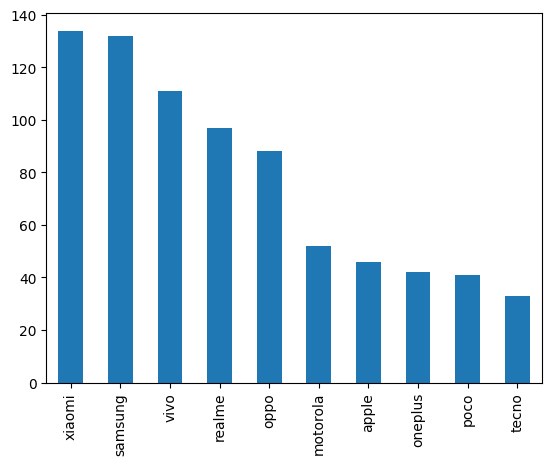

In [ ]:
# 1. brand_name
df1['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='brand_name'>

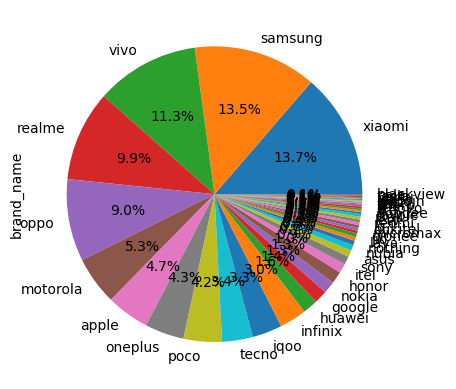

In [ ]:
df1['brand_name'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
#2 Model  (No need but kept for reference)
df1['model'].value_counts()

OnePlus 11 5G                              1
Infinix Hot 12 Pro                         1
itel Vision 3                              1
OPPO A96 4G                                1
Xiaomi Redmi Note 11E 5G                   1
                                          ..
iQOO Z6 Pro 5G (8GB RAM + 128GB)           1
Samsung Galaxy A73 5G (8GB RAM + 256GB)    1
Realme 9 5G SE (8GB RAM + 128GB)           1
Poco F4 5G                                 1
Samsung Galaxy M52s 5G                     1
Name: model, Length: 980, dtype: int64

In [ ]:
#3 price
df1['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

In [ ]:
df1['price'].skew()

6.591790999665567

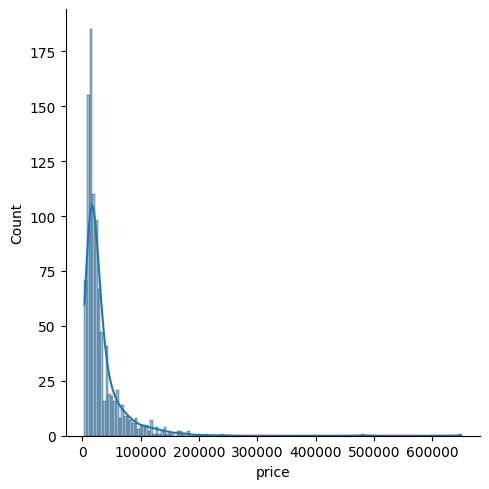

In [ ]:
sns.displot(kind='hist',data=df1,x='price',kde=True)

<Axes: >

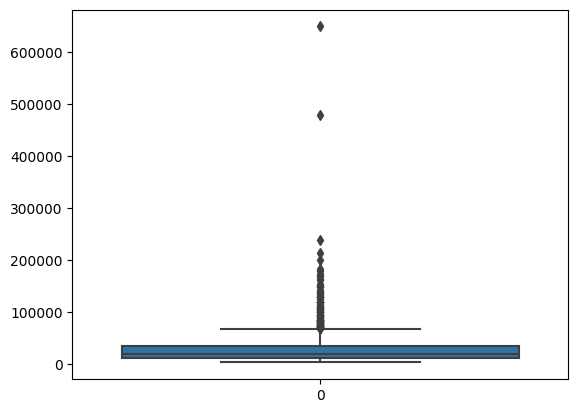

In [ ]:
sns.boxplot(df1['price'])

In [ ]:
#4
df1['rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 980 entries, 0 to 1019
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
879 non-null    float64
dtypes: float64(1)
memory usage: 47.6 KB


In [ ]:
df1['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

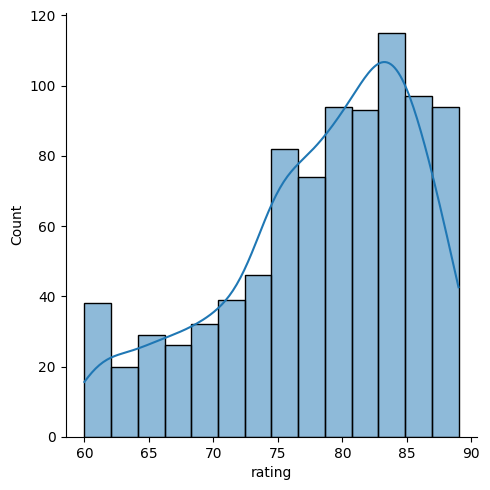

In [ ]:
sns.displot(kind='hist',data=df1,x='rating',kde=True)

<Axes: >

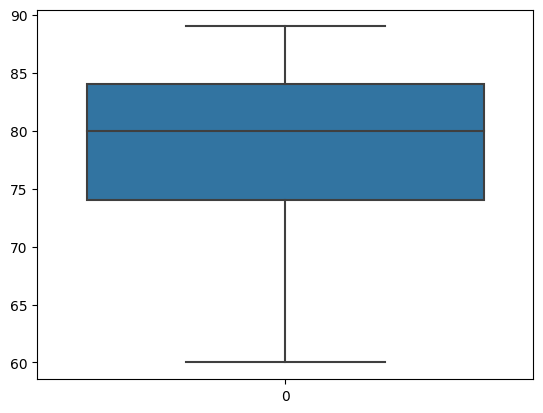

In [ ]:
sns.boxplot(df1['rating'])

In [ ]:
df1['rating'].isnull().sum()/980

0.10306122448979592

<Axes: ylabel='has_5G'>

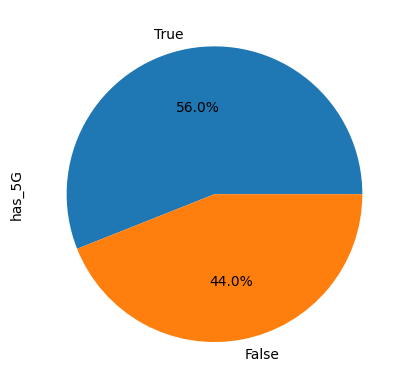

In [ ]:
#5 Has_5g
df1['has_5G'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='has_IR_blaster'>

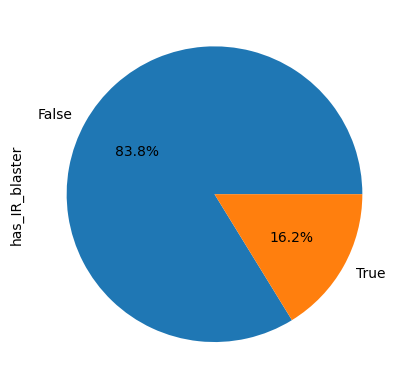

In [ ]:
#5 Has_IR_blaster
df1['has_IR_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='has_nfc'>

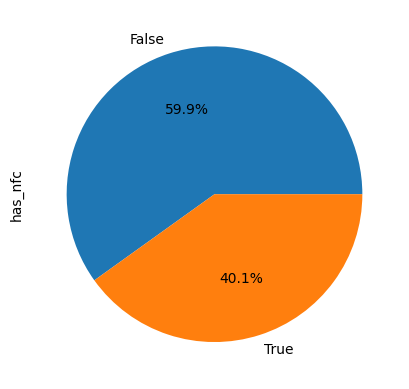

In [ ]:
df1['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='processor_brand'>

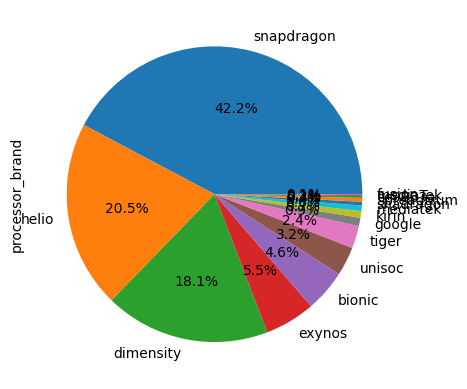

In [ ]:
#6 processor_brand
df1['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='num_cores'>

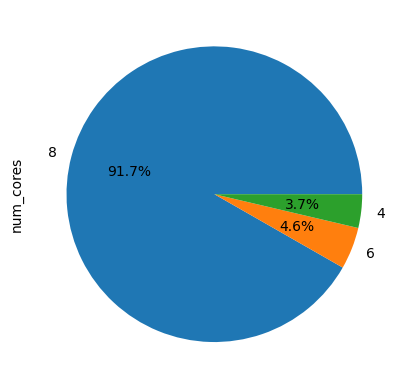

In [ ]:
df1['num_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='ram_capacity'>

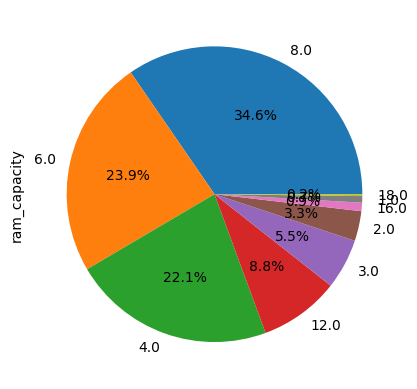

In [ ]:
df1['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='fast_charging_available'>

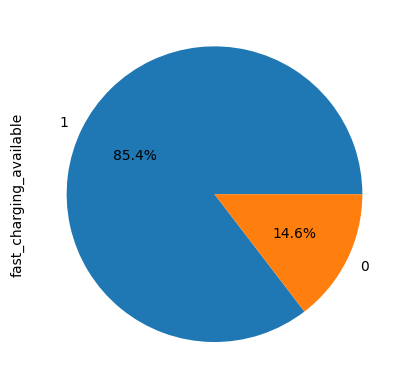

In [ ]:
df1['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='ram_capacity'>

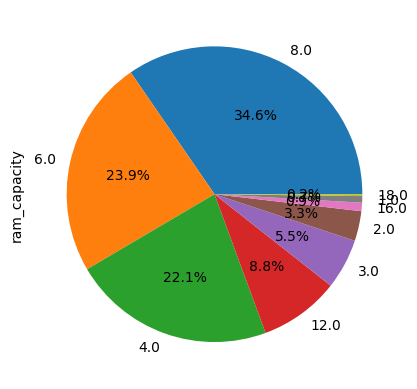

In [ ]:
df1['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='refresh_rate'>

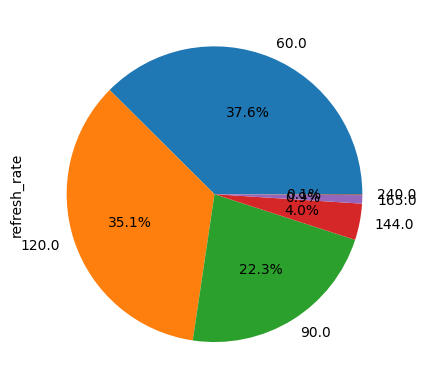

In [ ]:
df1['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: >

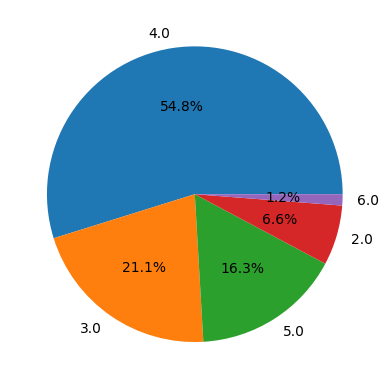

In [ ]:
#Cameras
# total cameras
(df1['num_rear_cameras'] + df1['num_front_cameras']).value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='os'>

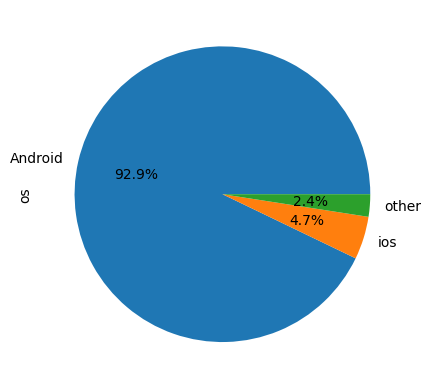

In [ ]:
df1['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='extended_memory_available'>

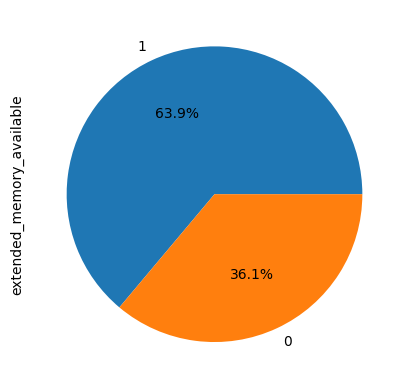

In [ ]:
df1['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='extended_upto'>

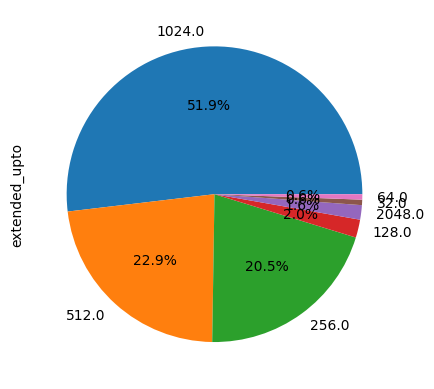

In [ ]:
df1['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
#
# Numerical columns



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# anamoly in primary front camera
df1['primary_front_camera']=primary_front_camera


<ipython-input-973-4f27edd79a05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_front_camera']=primary_front_camera


In [ ]:
temp_df=df1[df1['primary_front_camera']=='Main']
df1.loc[temp_df.index,'primary_front_camera']=np.nan

In [ ]:
df1['primary_front_camera'].value_counts()

16      307
8       178
32      155
5       119
12       50
13       41
20       37
10       24
50       12
60       10
44        8
40        6
2         5
7         5
24        3
25        3
10.8      3
48        2
11.1      2
0.3       1
2.1       1
10.7      1
10.1      1
12.6      1
Name: primary_front_camera, dtype: int64

In [ ]:
df1['primary_front_camera']=df1['primary_front_camera'].astype(float)

<ipython-input-976-794018c70851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_front_camera']=df1['primary_front_camera'].astype(float)


In [ ]:
def plott(column):
  sns.displot(kind='hist',kde=True, data=df1,x=column, label= column)
  sns.catplot(kind='box',data=df1,x=column)

In [ ]:
columns=df1.select_dtypes(include=['float64','int64']).iloc[:,[3,6,8,9,13,14,16]].columns
columns

Index(['processor_speed', 'battery_capacity', 'fast_charging', 'screen_size',
       'primary_rear_camera', 'primary_front_camera', 'extended_upto'],
      dtype='object')

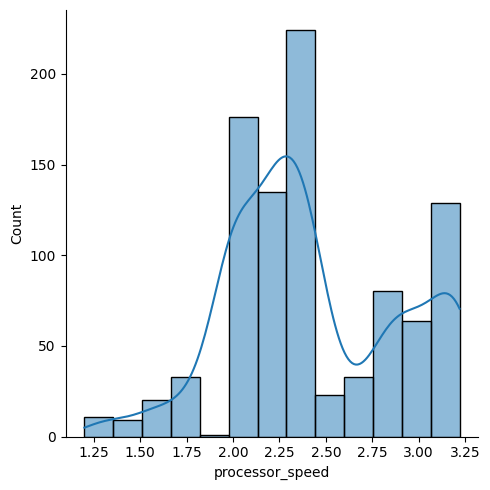

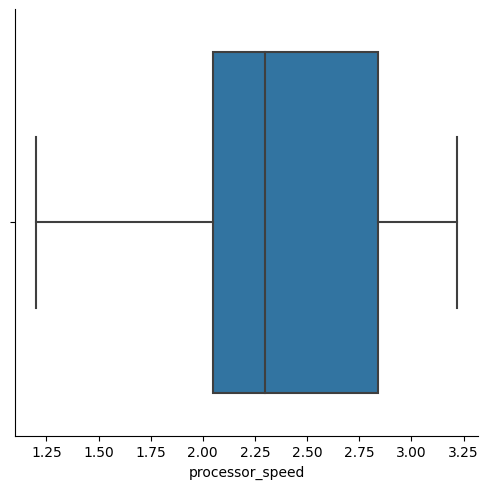

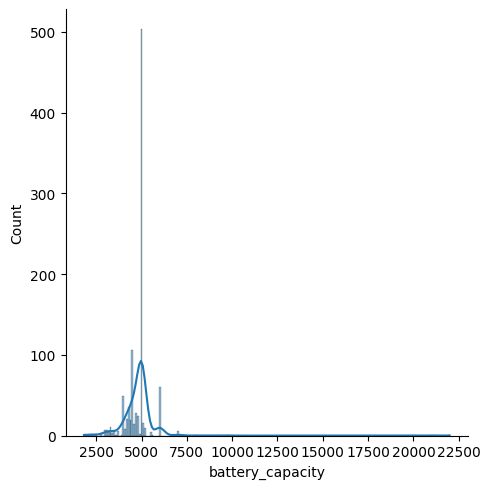

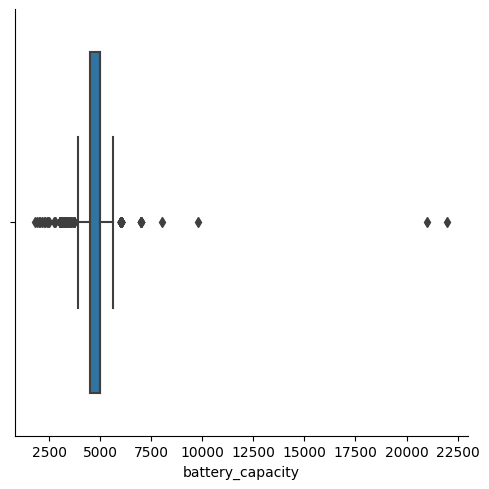

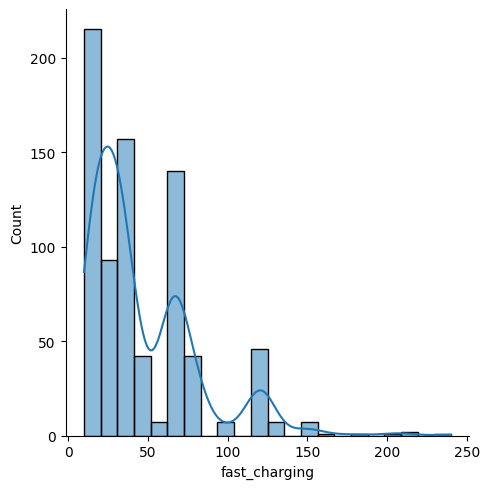

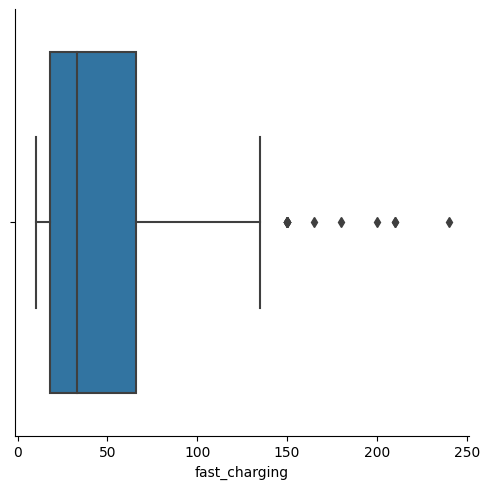

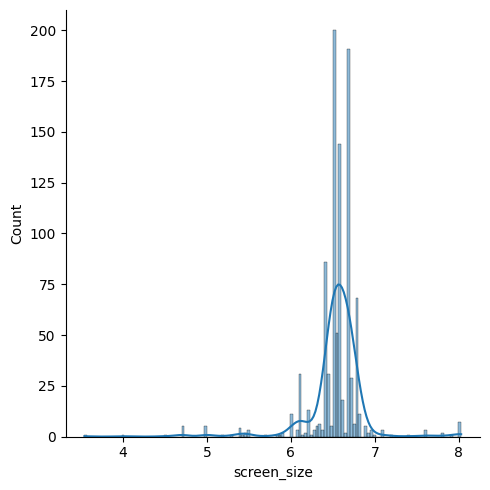

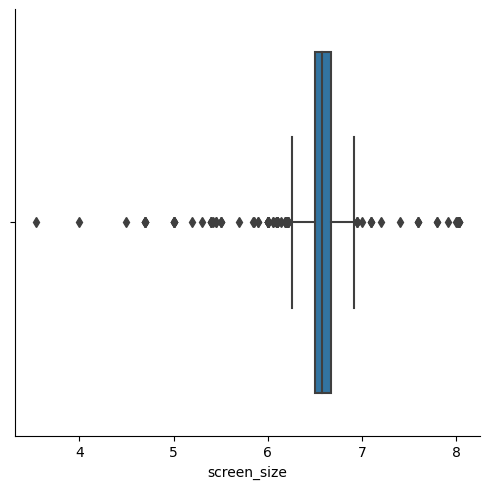

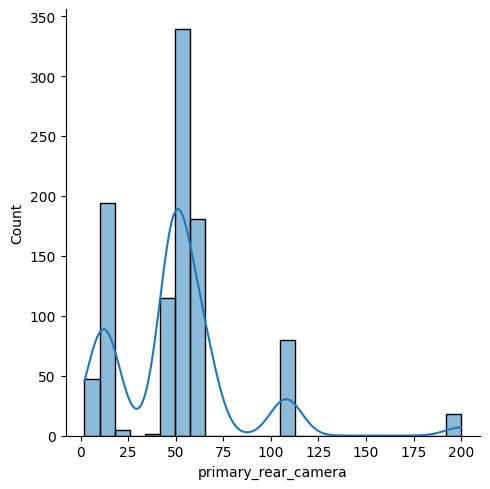

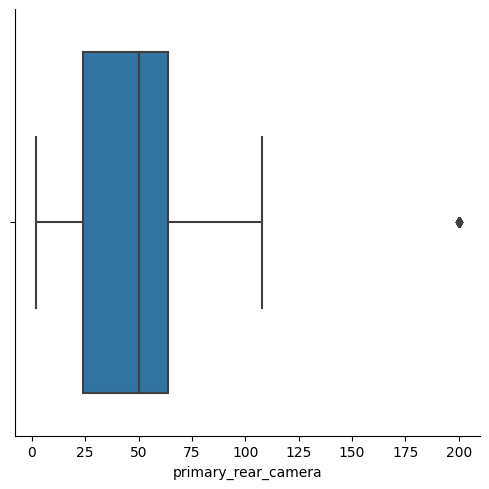

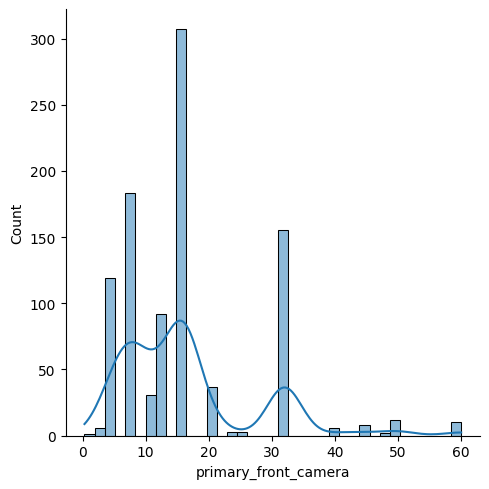

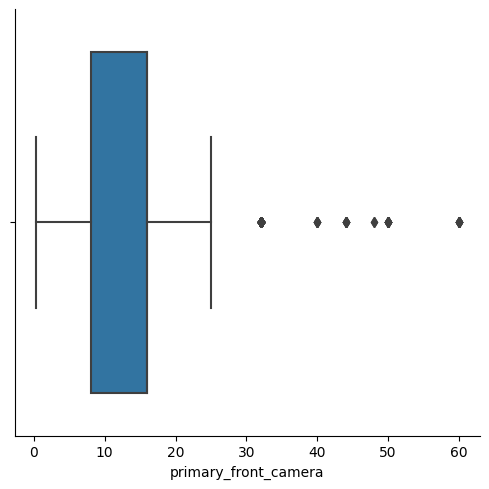

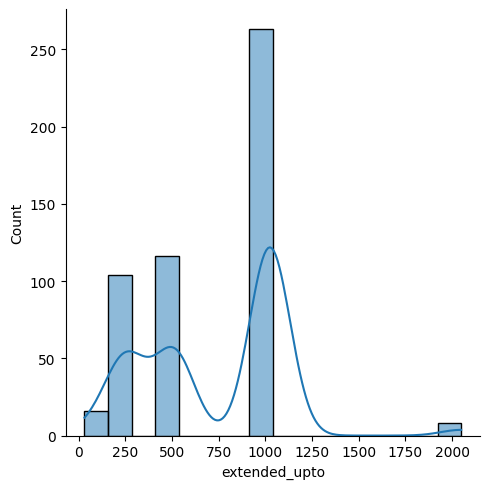

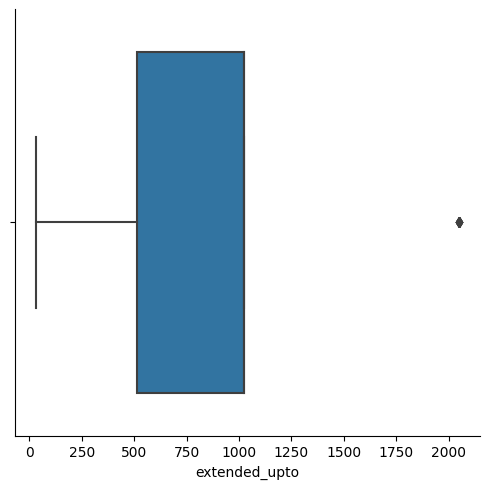

In [ ]:
for col in columns:
  plott(col)

#Bivariate
As the  aim here is to analyze price data so every bivariate analysis will be based on the price column

In [ ]:
# Brand-Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'royole'),
  Text(30, 0, 'sony'),
  Text(31, 0, 'oukitel'),
  Text(32, 0, 'vertu'),
 

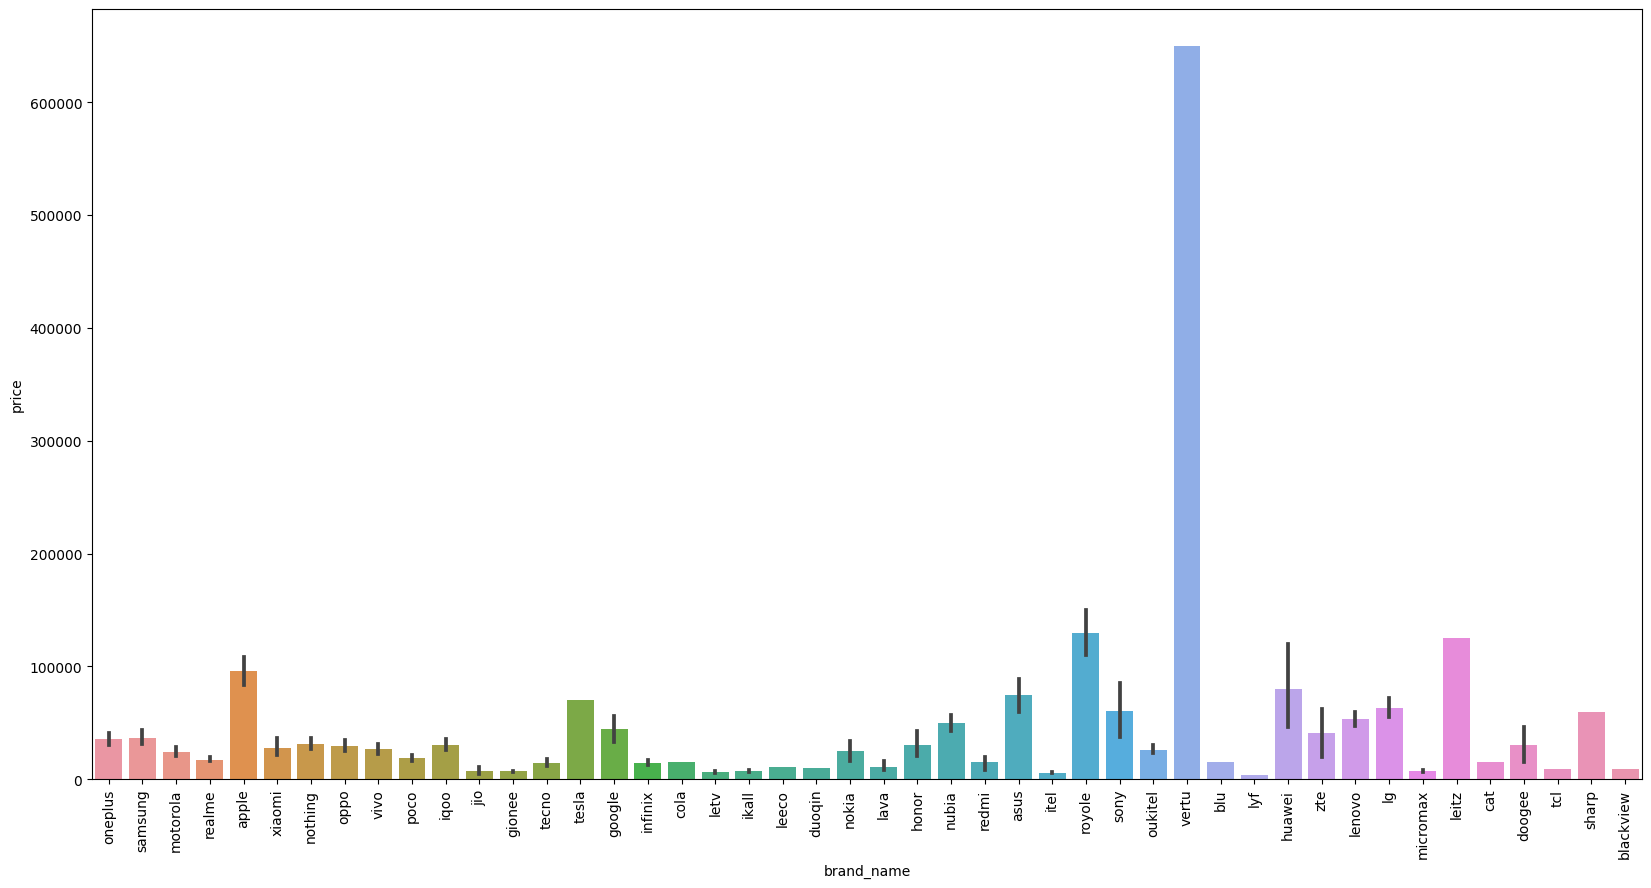

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df1,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [ ]:
x=df1.groupby('brand_name').count()['model']
x

brand_name
apple         46
asus           7
blackview      1
blu            1
cat            1
cola           1
doogee         2
duoqin         1
gionee         3
google        14
honor         13
huawei        16
ikall          3
infinix       29
iqoo          32
itel          10
jio            4
lava           4
leeco          1
leitz          1
lenovo         2
letv           3
lg             3
lyf            2
micromax       3
motorola      52
nokia         13
nothing        5
nubia          6
oneplus       42
oppo          88
oukitel        3
poco          41
realme        97
redmi          3
royole         2
samsung      132
sharp          1
sony           9
tcl            1
tecno         33
tesla          1
vertu          1
vivo         111
xiaomi       134
zte            2
Name: model, dtype: int64

In [ ]:
temp_df = df1[df1['brand_name'].isin(x[x > 10].index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

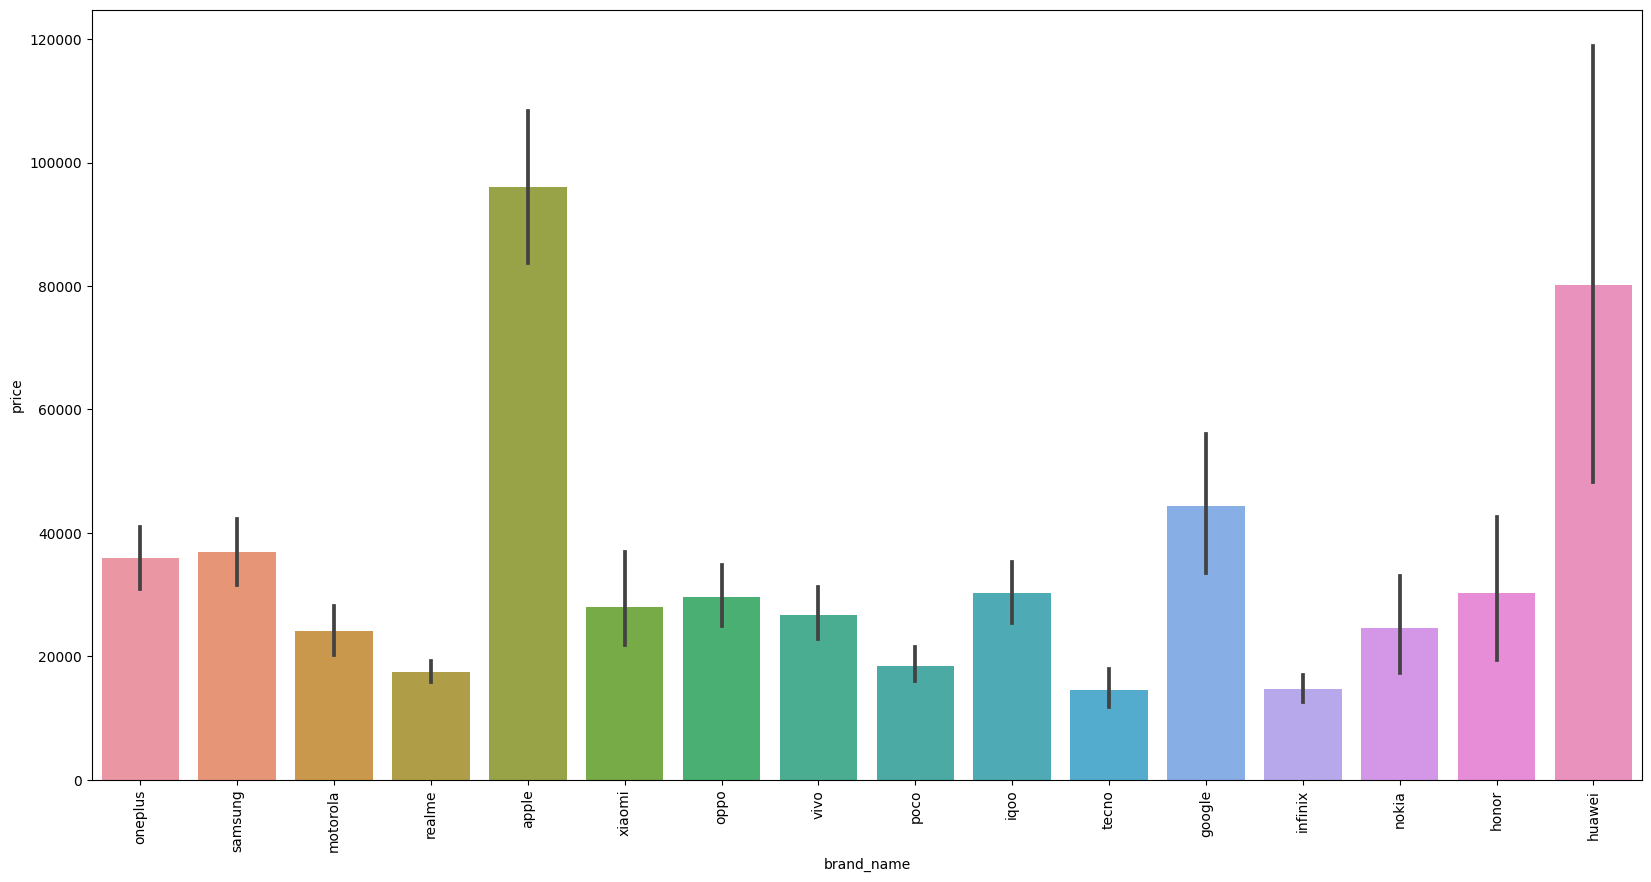

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

<Axes: xlabel='rating', ylabel='price'>

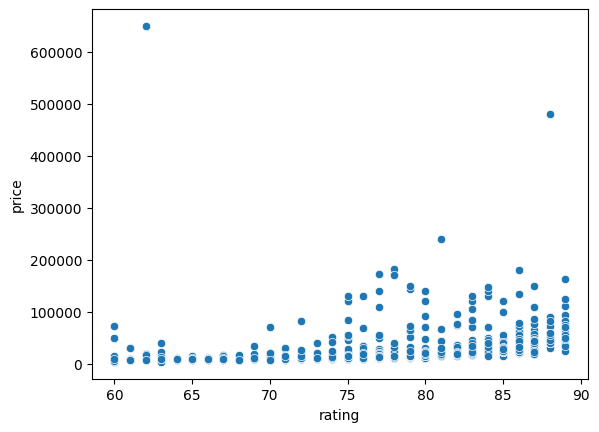

In [ ]:
sns.scatterplot(data=df1,x='rating',y='price')

<Axes: xlabel='has_5G', ylabel='price'>

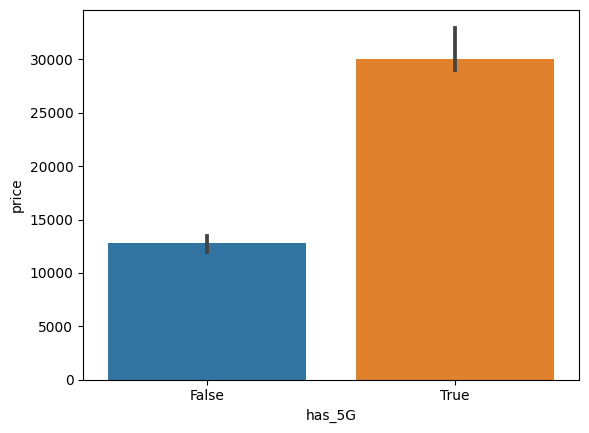

In [ ]:
sns.barplot(data=df1,x='has_5G',y='price',estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

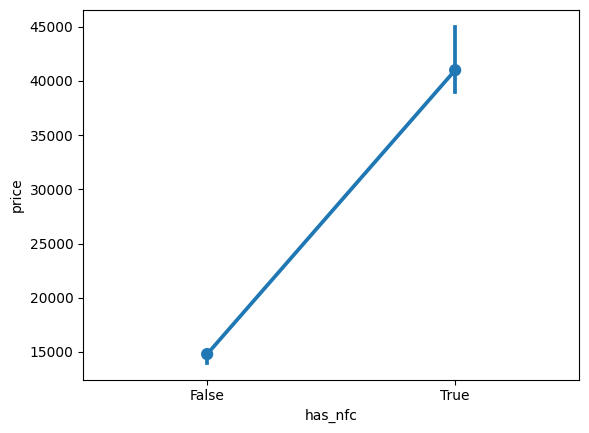

In [ ]:
sns.pointplot(data=df1,x='has_nfc',y='price',estimator=np.median)

<Axes: xlabel='has_IR_blaster', ylabel='price'>

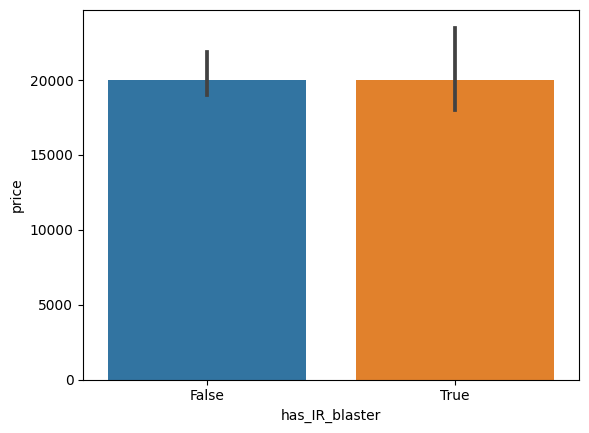

In [ ]:
sns.barplot(data=df1,x='has_IR_blaster',y='price',estimator=np.median)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'tiger'),
  Text(7, 0, 'snadragon'),
  Text(8, 0, 'google'),
  Text(9, 0, 'mediaTek'),
  Text(10, 0, 'mediatek'),
  Text(11, 0, 'sc9863a'),
  Text(12, 0, 'spreadtrum'),
  Text(13, 0, 'fusion'),
  Text(14, 0, 'kirin')])

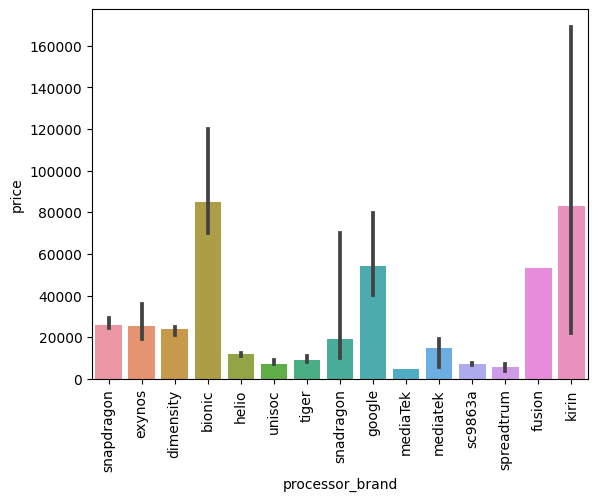

In [ ]:
sns.barplot(data=df1,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

<Axes: xlabel='num_cores', ylabel='price'>

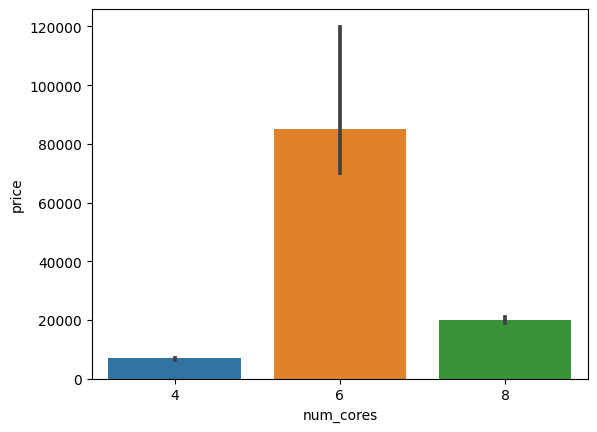

In [ ]:
sns.barplot(data=df1,x='num_cores',y='price',estimator=np.median)

In [ ]:
pd.crosstab(df1['num_cores'],df1['os'])

os,Android,ios,other
num_cores,,,
4,33,1,2
6,1,44,0
8,876,1,22


<Axes: xlabel='processor_speed', ylabel='price'>

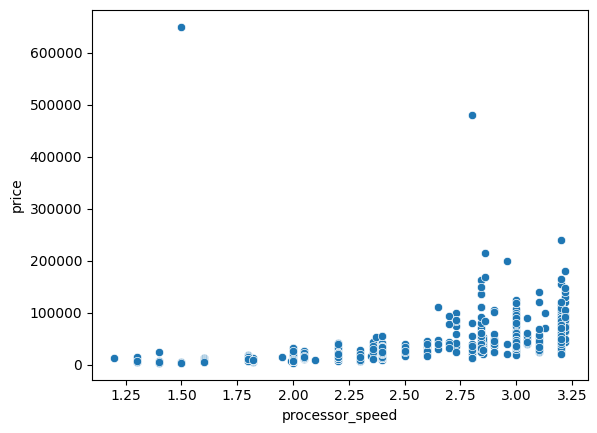

In [ ]:
sns.scatterplot(data=df1,x='processor_speed',y='price')

<Axes: xlabel='ram_capacity', ylabel='price'>

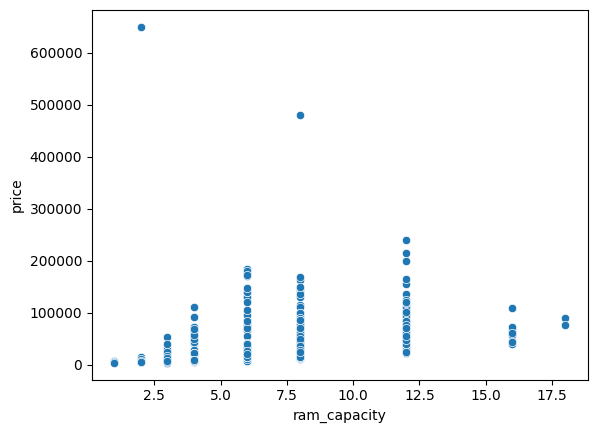

In [ ]:
sns.scatterplot(data=df1,x='ram_capacity',y='price')

<Axes: xlabel='ram_capacity', ylabel='price'>

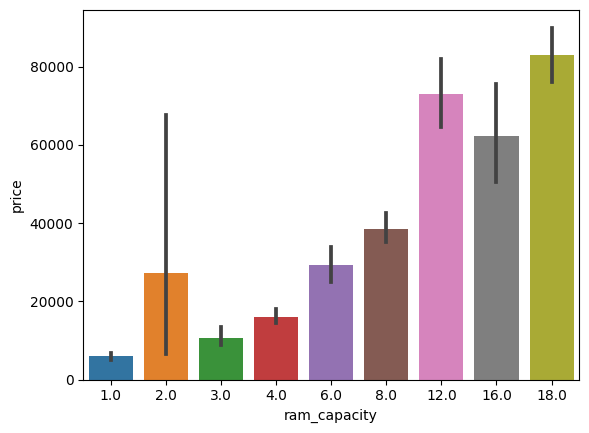

In [ ]:

sns.barplot(data=df1,x='ram_capacity',y='price')

#Price vs internal_memory

<Axes: xlabel='internal_memory', ylabel='price'>

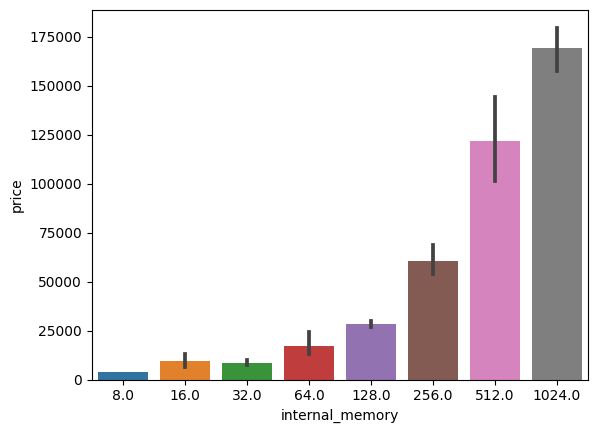

In [ ]:
sns.barplot(data=df1,x='internal_memory',y='price')

<Axes: xlabel='battery_capacity', ylabel='price'>

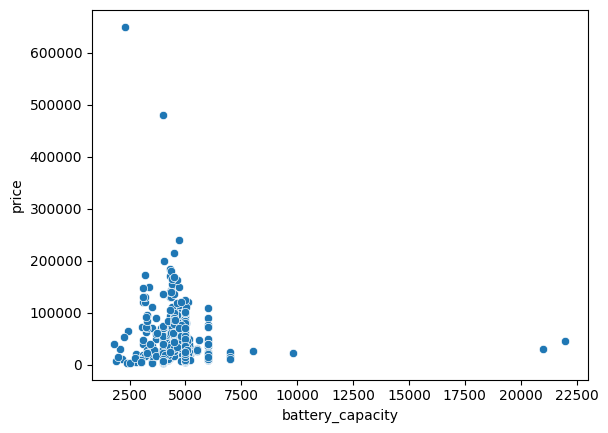

In [ ]:
sns.scatterplot(data=df1,x='battery_capacity',y='price')

In [ ]:
temp_df=df1[df1['battery_capacity'] < 10000]

<Axes: xlabel='battery_capacity', ylabel='price'>

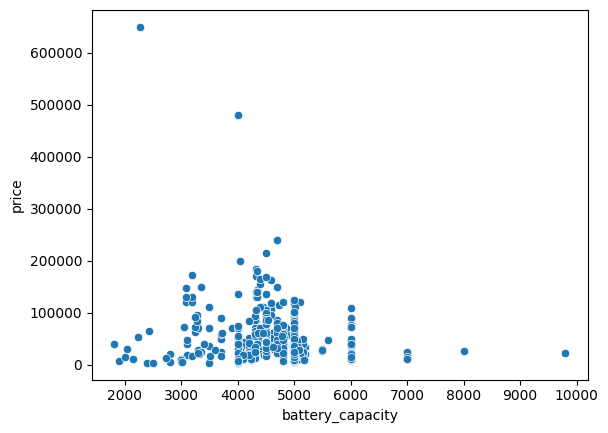

In [ ]:
sns.scatterplot(data=temp_df,x='battery_capacity',y='price')

# price vs fast_charging_available

<Axes: xlabel='fast_charging_available', ylabel='price'>

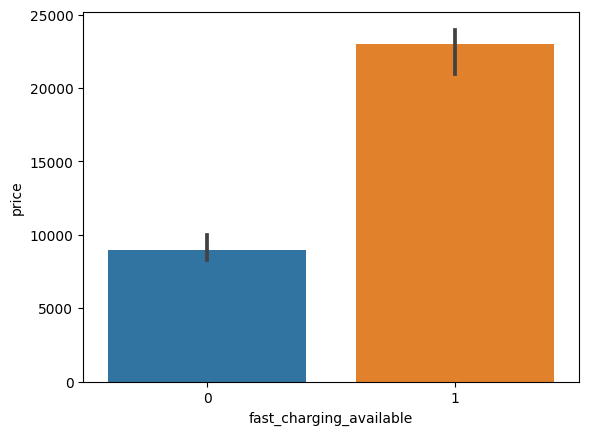

In [ ]:
sns.barplot(data =df1,x='fast_charging_available',y='price',estimator=np.median)

<Axes: xlabel='fast_charging', ylabel='price'>

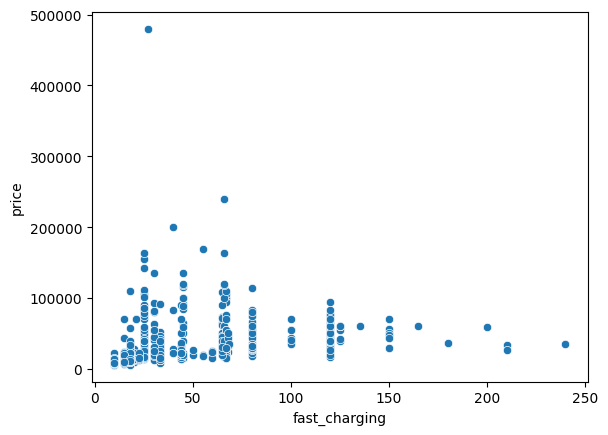

In [ ]:
sns.scatterplot(data=df1,x='fast_charging',y='price')


<Axes: xlabel='screen_size', ylabel='price'>

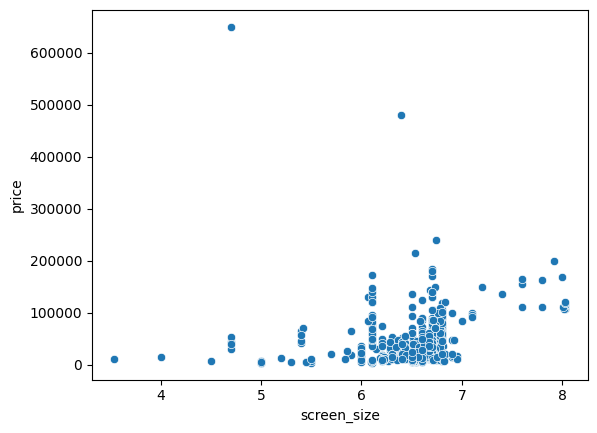

In [ ]:
sns.scatterplot(data=df1,x='screen_size',y='price')

<Axes: xlabel='refresh_rate', ylabel='price'>

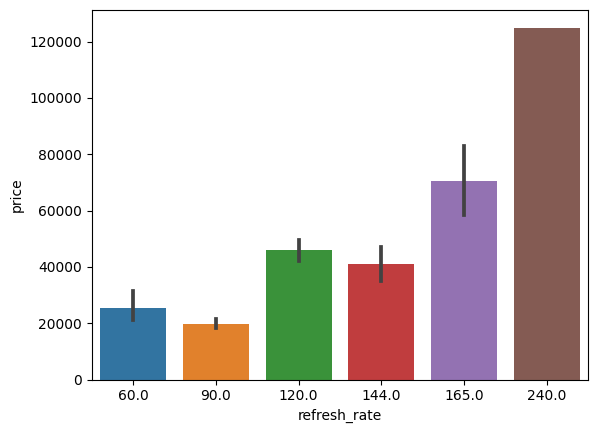

In [ ]:
# Refresh Rate
sns.barplot(data=df1,x='refresh_rate',y='price')

<Axes: xlabel='num_rear_cameras', ylabel='price'>

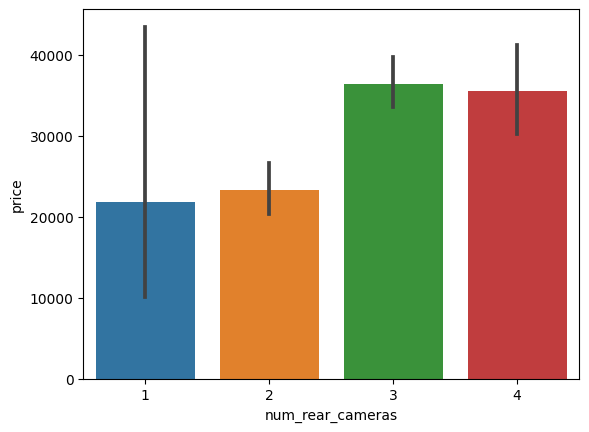

In [ ]:
#num_rear_cameras
sns.barplot(data=df1,x='num_rear_cameras',y='price')

<Axes: xlabel='num_front_cameras', ylabel='price'>

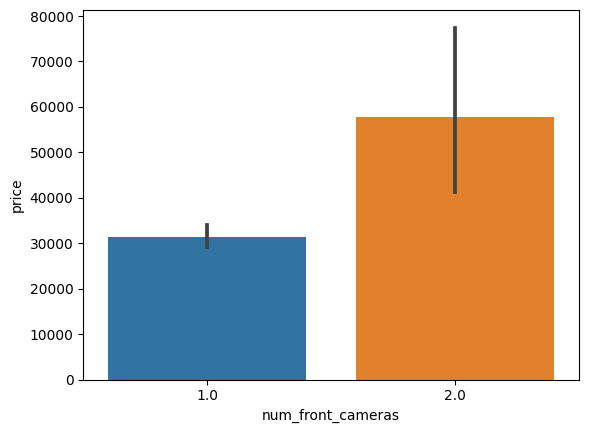

In [ ]:
#num_front_cameras
sns.barplot(data=df1,x='num_front_cameras',y='price')

<Axes: xlabel='primary_rear_camera', ylabel='price'>

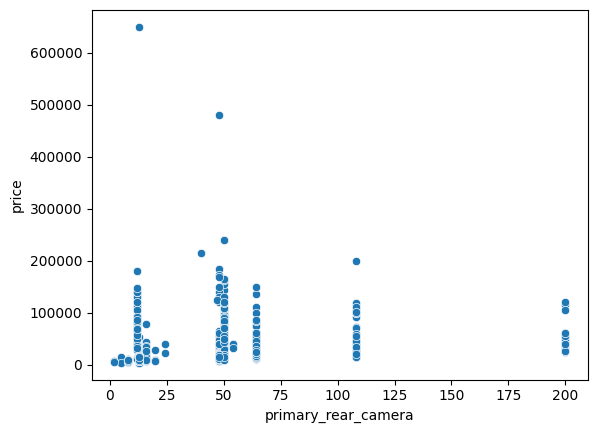

In [ ]:
#primary_rear_camera
sns.scatterplot(data=df1,x='primary_rear_camera', y='price',)


<Axes: xlabel='primary_front_camera', ylabel='price'>

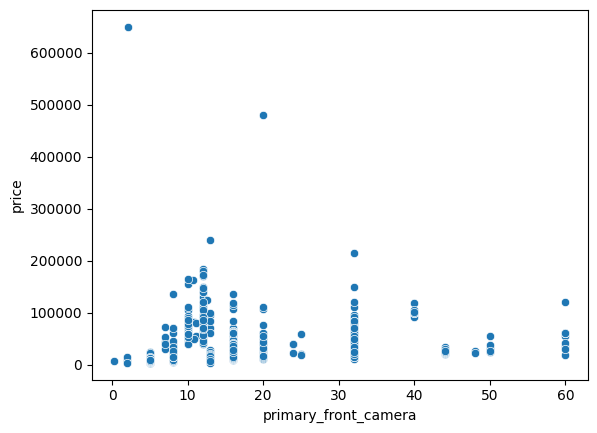

In [ ]:
sns.scatterplot(data=df1,x='primary_front_camera', y='price')

<Axes: xlabel='extended_memory_available', ylabel='price'>

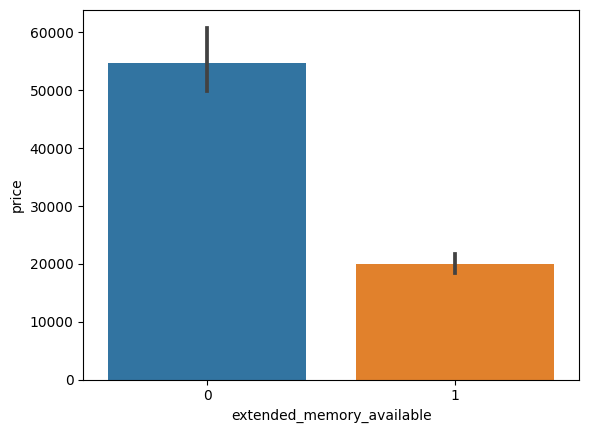

In [ ]:
#extended_memory_availabl
sns.barplot(data=df1,x='extended_memory_available', y='price')

<Axes: xlabel='extended_upto', ylabel='price'>

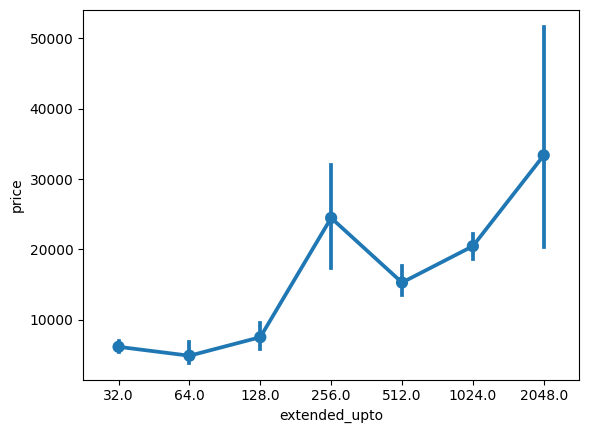

In [ ]:
#extended_upto
sns.pointplot(data=df1,x='extended_upto', y='price')

<Axes: xlabel='os', ylabel='price'>

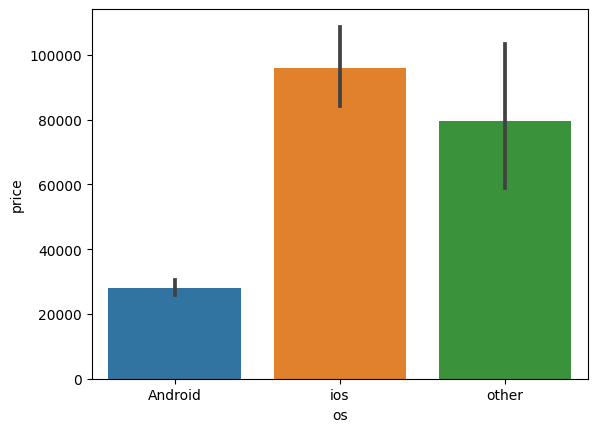

In [ ]:
#os vs price
sns.barplot(data=df1,x='os', y='price')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_IR_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    int64  
 9   processor_speed            938 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  internal_memory            980 non-null    float64
 12  battery_capacity           969 non-null    float64
 13  fast_charging_available    980 non-null    int64 

In [ ]:
df1.corr()['price']

<ipython-input-1011-99fcaf31f708>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['price']


price                        1.000000
rating                       0.283504
has_5G                       0.305066
has_nfc                      0.470951
has_IR_blaster              -0.015807
num_cores                   -0.065820
processor_speed              0.474049
ram_capacity                 0.386002
internal_memory              0.557168
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277562
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_rear_camera          0.092095
primary_front_camera         0.162995
extended_memory_available   -0.423621
extended_upto                0.048280
Name: price, dtype: float64

Conclusion:
1. Outlier in price columns
2. rataing missing value main issue
3. has_5g, Has_IR_blaster, Has_nfc, gives me
5. Processor_speed = almost octa core
6. resolution- scope for feature engineering, features can be added which can show the hd ultra hd screens
7. There lot of outliers in the price column and it is heavily scewed.

    Bivariate()
1. brand-price:
            1. Apple phones are heavily priced
2. price-ratings
            1. Some outliers with Not a significant pattern and relationship in them
3.price-has_5G
            1. significant impact of 5G phone on the price (price is higher for 5G phones)
4.price-has_Nfc
            1. Significant relation between price and nfc
5.price-has_ir_blaster
            1. No colcusive ration between the two of them
6.price vs num_cores
            1. Six core phones are signigicantly costlier than the other two(6 cores-apple)
7. price vs processor_speed
            1. Price do increase with increase in processor speed but not very exclusive correlation
8. price vs ram_capacity
            1. Holds good linear relationship of price upto 12 GB of ram onwards it drops
9.  price vs internal_memory
            1. strong linear relationship

10. price vs battery_capacity
            1. positive relation between the battery and price but not so exclusive

11. price vs fast charging availabe
            1. higher price for fast charging

12. price vs fast_charging capacity
            1. not so significant realtions
13. Price vs screen_size
            1. majority of the phones are in 6 to 7 inches and sight linear realation with price
14. Price vs refresh_rate
            1. pretty significant positive linear realtion
15. price vs num_rear_cameras
            1. no_of_rear_cameras 1,2 doesnt'really differ in price but when we move to 3 then there is significant jump in the price but again there is no significant change from 3 to 4
16. price vs num_front_cameras
            1. significant jump in price when moved formm 1 to 2
17. price vs primary_rear_camera
            1.No exclusive relation between both
18. price vs primary_front_camrea
            1. No exclusive relation between both
19. price vs extended_memory_available
            1. extended_memory_available has negative correlation to the price
20. price vs extended upto
            1. extended upto has positive relation with price with one sligh surge of slope in case of 256 GB
21. price vs os
            1.  apple phones and other(exclusive phones ) has higher price compared to andriod phones
price is coniderably dependent on following columns: [internal_memory,ram_capacity,has_nfc,processor_speed]
